# Equações diferenciais e o Circuito de Chua

---

**Como entregar:** Enviar o seu jupyter notebook (.ipynb) pelo próprio Classroom. Uma cópia deste será automaticamente criada para você no seu Google Drive, você pode usar essa cópia mesmo, sem necessidade de criar outra.


**Leia com atenção:**


*   Você deve fazer obrigatoriamente todas as atividades marcadas com a exclamação❗.
*   Atividades marcadas com 🧩 são opcionais.
*   Use o Google Colab para executar o notebook e fazer a tarefa, ou baixe no seu computador e faça na API que preferir, mas lembre-se de entregar no Classroom a versão final.
*   A atividade vai ser baseada no seu número USP.
*   Há questões dissertativas!
*   Siga o passo a passo indicado no tutorial, respondendo as perguntas das atividades propostas no seu jupyter notebook.
*   O notebook que entregar deve estar 100% funcional, isto é, todos os códigos rodando no Colab sem erros.
*   Entregue o notebook completo, com todo conteúdo original e mais os seus códigos e textos.
*   Esta tarefa é individual e haverá controle de similaridade. Tentativas de cópias, fraude, compra-venda de EPs não serão toleradas, levando a nota zero na tarefa e posterior análise para medidas cabíveis.
*   ❗Exercício 00:❗ Para mostrar que você leu até aqui, escreva seu nome completo (assinatura) na linha a seguir:




*Assinatura:*

Diego Pinheiro de Moura



---



## Preliminares

In [1]:
import numpy as np                  #Numpy
import matplotlib.pyplot as plt     # Gráficos/figuras
from prettytable import PrettyTable #Tabelas mais bonitinhas

Referências:
*   https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.01-ODE-Initial-Value-Problem-Statement.html

#### ❗Exercício 0❗

Preencha o seu número USP abaixo

In [2]:
# Coloque aqui o seu número USP
nusp = 9913683

nusp_str=str(nusp).replace("0","")

magic_ilong = int(nusp_str)
magic_int = int(str(magic_ilong)[-1:])*10
#magic_int = int(list(set(nusp_str))[0])

print("magic_ilong  =", magic_ilong)
print("magic_int =", magic_int)

magic_ilong  = 9913683
magic_int = 30




---



## O problema de Valor Inicial

Nosso problema em questão é o de achar uma função $u \in \mathcal{C}^1([t_0, T])$, que resolva a equação
$$
u'(t) = f(t,u(t)),
$$
para uma dada função $f(t,u)$, suficientemente suave, considerando conhecido o valor inicial de $u$,
$$
u(t_0)=u_0.
$$

Este problema é conhecido como problema de valor inicial, ou problema de Cauchy.

Observações:
*   A função $u$ pode ser uma função com imagem em $\mathbb{R}$ ou em $\mathbb{R}^n$, isto é, $u$ pode ser uma função vetorial
*   Se $u$ é vetorial ($u:[t_0, T] → \mathbb{R}^n$), então $f$ também deve ser, ($f:[t_0, T]\times \mathbb{R}^n → \mathbb{R}^n$), assim como $u_0\in \mathbb{R}^n$.
*   Nesses casos vetoriais, temos um sistema de equações diferenciais.



---



## Discretização

Pela definição no enunciado, temos $t_k = t_0 + k \cdot h\quad k=0, 1, ..., n$ dessa forma $t_n = T$, porém o código fornecido pelos professores e a implementação própria

Vamos discretizar o tempo dividindo o intervalo de tempo em $n$ subintervalos uniformemente espaçados, obtendo
 $$t_k=\frac{k}{n}(T-t_0)+t_0, \quad k=0, 1, ..., n.$$

 Chamaremos o passo de tempo de $h$,
 $$
h= \frac{T-t_0}{n}.
 $$

Definimos $u_k$ como sendo uma aproximação da função desejada no tempo $t_k$, isto é,

$$
u_k \approx u(t_k)
$$

Nosso objetivo é obter boas aproximações para $u(t_k)$.

Da série de Taylor, sabemos que
$$
u(t_{k+1})=u(t_k)+hu'(t_k)+O(h^2).
$$
Usando a definição do problema de Cauchy, temos que
$$
u(t_{k+1})=u(t_k)+hf(t_k, u(t_k))+O(h^2).
$$

Isso é a base para a construção do método de Euler para resolução do problema de valor inicial. O método de Euler é então dado por
$$
u_{k+1}=u_k+hf(t_k, u_k),
$$
que está bem definido se $u_0$ for dado.


### Primeiro Exemplo

Considere o problema de valor inicial dado por

$$
\begin{cases}
u'(t)=\lambda u(t), \quad  t \in [0,1]\\
u(0) = 1
\end{cases}
$$

Este problema tem solução analítica dada por $u(t)=e^{\lambda t}$.

In [3]:
#Definição do problema
t0 = 0
T = 1
u0 = 1.0
lam = 1

def f(t, u):
  return lam*u

#Solução teórica
def u(t):
  return np.exp(lam*t)

Campo vetorial e soluções "tangentes":

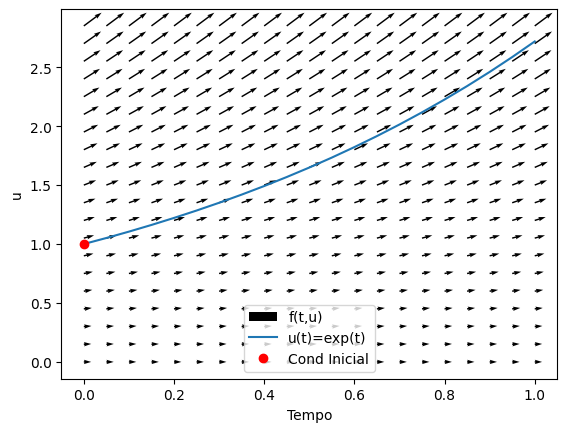

In [4]:
n = 20

#Grade de plotagem
t_tmp = np.linspace(t0, T, n+1)
u_tmp = np.arange(0, 3, 0.15)
t_grid, u_grid = np.meshgrid(t_tmp, u_tmp)

# du/dt=f(t,u)
# Gradient (dt/dt, du/dt) = (1, f(t,u))
DT = np.ones_like(t_grid) # 1
DU = u_grid  # lambda u

#Curva de solução
u0=1
u_t = np.exp(t_tmp)

#Vetores do campo
fig, ax = plt.subplots()
q = ax.quiver(t_grid, u_grid, DT, DU, angles='xy', label="f(t,u)")
ax.plot(t_tmp, u_t, label="u(t)=exp(t)")
ax.plot(0.0, u0, 'ro', label="Cond Inicial")
ax.set_xlabel("Tempo")
ax.set_ylabel("u")
plt.legend()
plt.show()

Na figura acima, temos o sistema de coordenadas dados por $(t,u)$, e estamos plotando a curva $(t,u(t))$. O gradiente desta curva é campo de vetores, dado por
$$
\frac{d}{dt}(t, u(t)) = (1, u'(t)) = (1, f(t,u)).
$$
Portanto, os vetores, $(1, f(t,u))$, para cada $(t,u)$, representados em preto na figura, estarão sempre tangentes a curva.

Em outro ponto de vista, queremos achar a curva $(t,u(t))$, começando no ponto $(t_0, u_0)$, que seja tangente a esse campo de vetores.




---



Implementação de um primeiro método numérico: Euler

In [5]:
# O método de Euler
def euler(u0, t0, T, f, n):
  h = (T-t0)/n
  u = np.empty(n+1)
  u[0]=u0
  for k in range(0,n):
    tk = t0+k*h
    u[k+1]=u[k]+h * f(tk, u[k])
  return u

In [6]:
n = 10

t = np.linspace(t0, T, n+1)
u_aprox = euler(u0, t0, T, f, n)
u_exata = u(t)

erro_final = np.abs(u_aprox[-1]-u_exata[-1])

tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max'])
tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final ])
print(tab)

+----+--------------+-------------------+-------------------+
| n  |   u Euler    |      u Exata      |      Erro Max     |
+----+--------------+-------------------+-------------------+
| 10 | 2.5937424601 | 2.718281828459045 | 0.124539368359045 |
+----+--------------+-------------------+-------------------+


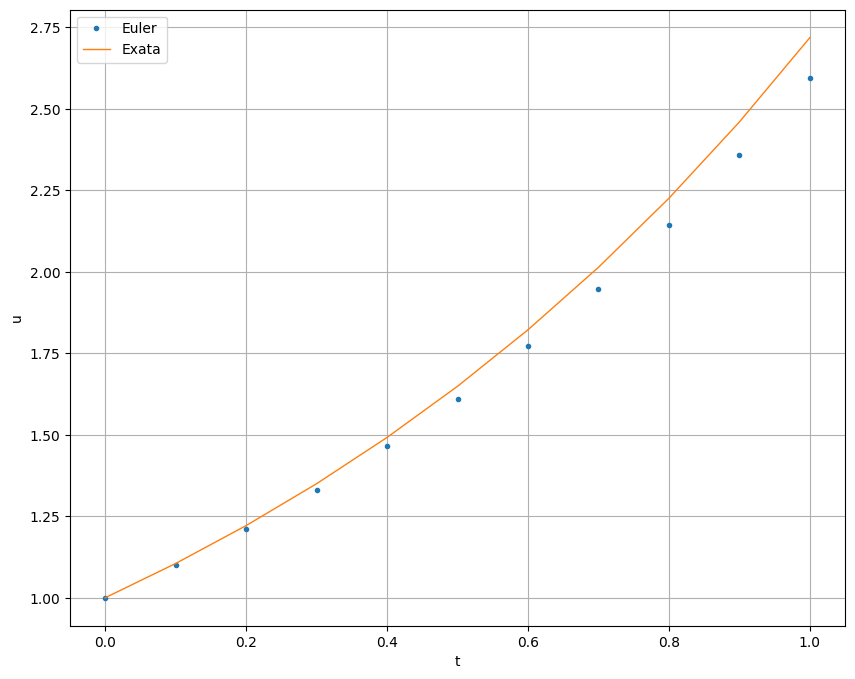

In [7]:
figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_aprox, '.', label="Euler", linewidth=1)
plt.plot(t, u_exata, label="Exata",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.legend()
plt.show()



---



Questão importante:

>  O que acontece com o erro quando aumentamos o número de pontos no tempo? (diminuímos $h$).


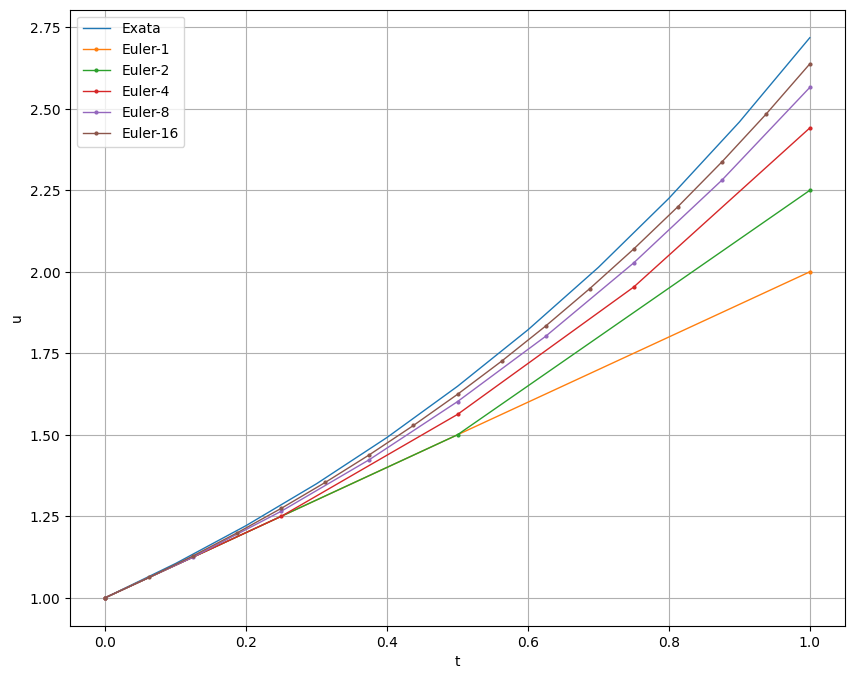

+----+--------------------+-------------------+---------------------+
| n  |      u Euler       |      u Exata      |       Erro Max      |
+----+--------------------+-------------------+---------------------+
| 1  |        2.0         | 2.718281828459045 |  0.7182818284590451 |
| 2  |        2.25        | 2.718281828459045 |  0.4682818284590451 |
| 4  |     2.44140625     | 2.718281828459045 |  0.2768755784590451 |
| 8  | 2.565784513950348  | 2.718281828459045 |  0.1524973145086972 |
| 16 | 2.6379284973665995 | 2.718281828459045 | 0.08035333109244558 |
+----+--------------------+-------------------+---------------------+


In [8]:
tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max'])
n_list = [1, 2, 4, 8,  16]

figure, axs = plt.subplots(figsize=(10,8))
plt.plot(t, u_exata, label="Exata",linewidth=1)
plt.xlabel("t")
plt.ylabel("u")

for n in n_list:
  t = np.linspace(t0, T, n+1)
  u_aprox = euler(u0, t0, T, f, n)
  u_exata = u(t)

  erro_final = np.abs(u_aprox[-1]-u_exata[-1])
  tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final ])

  plt.plot(t, u_aprox, '-o', label="Euler-"+str(n), linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.show()

print(tab)

In [9]:
tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max', "Razão"])

erro_final = []
for n in range(10):
  n = 2**n
  t = np.linspace(t0, T, n+1)
  u_aprox = euler(u0, t0, T, f, n)
  u_exata = u(t)

  erro_final.append(np.abs(u_aprox[-1]-u_exata[-1]))
  if n > 1 :
    tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final[-1],  erro_final[-2]/erro_final[-1]])


print(tab)

+-----+--------------------+-------------------+-----------------------+--------------------+
|  n  |      u Euler       |      u Exata      |        Erro Max       |       Razão        |
+-----+--------------------+-------------------+-----------------------+--------------------+
|  2  |        2.25        | 2.718281828459045 |   0.4682818284590451  | 1.5338665410585421 |
|  4  |     2.44140625     | 2.718281828459045 |   0.2768755784590451  | 1.6913078107692783 |
|  8  | 2.565784513950348  | 2.718281828459045 |   0.1524973145086972  | 1.8156095361486144 |
|  16 | 2.6379284973665995 | 2.718281828459045 |  0.08035333109244558  | 1.897834382662379  |
|  32 | 2.6769901293781833 | 2.718281828459045 |  0.04129169908086183  | 1.9459923636246856 |
|  64 |  2.6973449525651   | 2.718281828459045 |  0.020936875893945217 | 1.9721996390494474 |
| 128 | 2.7077390196880193 | 2.718281828459045 |  0.010542808771025758 | 1.985891648863529  |
| 256 | 2.712991624253433  | 2.718281828459045 | 0.005290204

Note que o erro cai pela metade (aproximadamente) quando dobramos o número de pontos (reduzimos o $h$ pela metade). Logo, dizemos que o método é de primeira ordem $O(h^1)$.

Isso será, ou foi, demonstrado em sala nas aulas teóricas.



---



###❗Exercício 1❗

Considere o problema de valor inicial

$$
\begin{cases}
u'(t)=-2\,tu^2/a, \quad  t \ge 0\\
u(0) = 1
\end{cases}
$$
onde $a$ é uma constante positiva.
Este problema tem solução analítica dada por
$$
  u(t) = \frac{1}{1 + t^2/a}.
$$

Vamos analisar o comportamento do erro para o Método de Euler com este exemplo. Posteriormente, iremos comparar os resultados com outro método.

Atividade:
1.   Defina $a =$ magic_int, ou seja, $a$ será o valor do seu último dígito não nulo do número usp multiplicado por 10.
2.   Resolva o problema no intervalo $[0,\sqrt{a}]$ usando o método de Euler com $2^k$ passos, $0 \le k \le 9$ (ou seja, $n=2^k$, $h=\sqrt{a}/2^k$, $0 \le k \le 9$.
3.   Apresente um gráfico com a solução exata e as aproximações para $n = 4, 8$ e $16$.
4.   Construa uma tabela apresentando, para os $10$ valores de $n$ usados, os valores da solução exata e das aproximações em $T=\sqrt{a}$, o valor absoluto dos erros em $T=\sqrt{a}$ e a razão entre estes erros para valores de $n$ consecutivos. O erro se comporta de acordo com o esperado?


In [10]:
# E1-Q1: Definir o valor de a

a = magic_int

print("a = " + str(a))
print("raiz de a = " + str(a ** 0.5))

a = 30
raiz de a = 5.477225575051661


In [11]:
# E1-Q2: Método de Euler

def metodo_euler(u0, t0, T, f, n):
    # Código do método de Euler (Dado pelos professores)

    # Entradas:
    # u0 ---> Estado Inicial
    # t0 ---> Tempo Inicial
    # T  ---> Tempo Final
    # f  ---> Função a ser integrada
    # n  ---> Número de subintervalos

    # Saídas:
    # Vetor de aproximações ---> u

    # Definições iniciais:
    h = (T - t0) / n    # Passo de tempo
    u = np.empty(n + 1) # Inicialização de u
    u[0] = u0           # u[0] é dado no PVI

    for k in range(0, n):
        # Loop para calcular as aproximações
        tk = t0 + k * h                   # Cálculo do próximo tk
        u[k + 1] = u[k] + h * f(tk, u[k]) # Cálculo do próximo uk

    return u

# Nosso problema
def u_linha(t, u):
    # Código de u'(t, u)

    # Entradas:
    # t ---> Tempo
    # u ---> Estado

    # Saídas:
    # Derivada de u ---> u'(t)
    return (-2 * t * (u ** 2)) / a

# Dados
u0 = 1.0
t0 = 0.0
T  = np.sqrt(a)

# Resolvendo para 0 <= k <= 9
resultados_euler = []
for k in range(0, 10):
    n = 2 ** k
    resultados_euler.append(metodo_euler(u0, t0, T, u_linha, n))

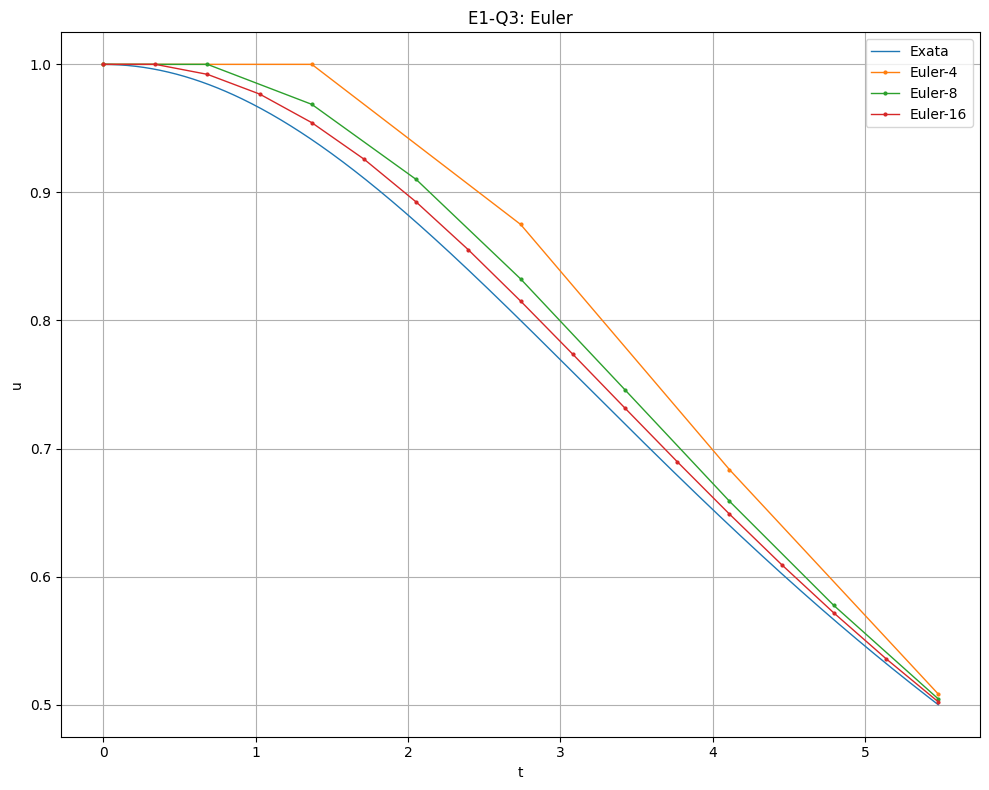

In [12]:
# E1-Q3: Apresentar um gráfico
# Código do gráfico adaptado dos professores

def u_teorico(t):
    # Código da solução exata de u(t)

    # Entradas:
    # t ---> Tempo

    # Saídas:
    # Derivada de u ---> u'(t)
    return 1 / (1 + (t ** 2) / a)

t = np.linspace(t0, T, n + 1)
u_exata = u_teorico(t)

figure, axs = plt.subplots(figsize=(10, 8))
plt.plot(t, u_exata, label="Exata", linewidth=1)

plt.title("E1-Q3: Euler")
plt.xlabel("t")
plt.ylabel("u")

# Exercício pede n = 4, 8 e 16 ==> k = 2, 3 e 4
for k in [2, 3, 4]:
    n = 2 ** k                    # Calcula n dado k
    t = np.linspace(t0, T, n + 1) # Cria os passos temporais (x do gráfico)
    u_aprox = resultados_euler[k] # Recupera valor calculado em E1-Q2
    # Cria visualização
    plt.plot(t, u_aprox, '-o', label="Euler-" + str(n), linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# E1-Q4: - Construir uma tabela
# Código da tabela adaptado dos professores

tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max', "Razão"])

erro_final = []
for k in range(10):
    n = 2 ** k                    # Calcula n dado k
    t = np.linspace(t0, T, n + 1) # Cria os passos temporais (x do gráfico)
    u_aprox = resultados_euler[k] # Recupera valor calculado em E1-Q2
    u_exata = u_teorico(t)        # Calcula a solução exata

    erro_final.append(np.abs(u_aprox[-1] - u_exata[-1]))
    if n > 1 :
        tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final[-1],  erro_final[-2]/erro_final[-1]])

print(tab)

+-----+--------------------+---------+------------------------+--------------------+
|  n  |      u Euler       | u Exata |        Erro Max        |       Razão        |
+-----+--------------------+---------+------------------------+--------------------+
|  2  |        0.5         |   0.5   |          0.0           |        inf         |
|  4  | 0.5083560943603516 |   0.5   |  0.008356094360351562  |        0.0         |
|  8  | 0.5045486124686074 |   0.5   | 0.0045486124686073826  |  1.83706447142328  |
|  16 | 0.5022642864188357 |   0.5   | 0.0022642864188356926  | 2.0088503074387125 |
|  32 | 0.5011213922644929 |   0.5   | 0.0011213922644929264  | 2.0191742805177655 |
|  64 | 0.5005571541057451 |   0.5   | 0.0005571541057450835  | 2.0127147102205876 |
| 128 | 0.5002775936902161 |   0.5   | 0.0002775936902160714  | 2.0070849064019067 |
| 256 | 0.5001385392778465 |   0.5   | 0.00013853927784646114 | 2.0037183283409346 |
| 512 | 0.500069203811387  |   0.5   | 6.920381138697529e-05  | 2

<ipython-input-13-c69540dabdcb>:15: RuntimeWarning: divide by zero encountered in scalar divide
  tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final[-1],  erro_final[-2]/erro_final[-1]])


### Respostas Exercício 1:

*   **Questão 1:**

O valor de $a$ é definido como $magic\_int$, assim:

$$a = 30$$ $$\sqrt{a} = \sqrt{30} \approx 5.47723$$

*   **Questão 2:**

As respostas para cada estimativa pedida para $0 \le k \le 9$ estão contidas dentro de uma lista Python com nome `resultados_euler`, cada uma das posições `resultados_euler[k]` corresponde à estimativa de $u(t)$ com $2^k$ pontos. De qualquer forma os valores estão explícitos abaixo:

```
K=0:
[1.0, 1.0]

K=1:
[1.0, 1.0, 0.5]

K=2:
[1.0, 1.0, 0.875, 0.68359375, 0.5083560943603516]

K=3:
[1.0, 1.0, 0.96875, 0.91009521484375, 0.8324445929611102, 0.7458240929173366, 0.6589094714210916, 0.5775041542595124, 0.5045486124686074]

K=4:
[1.0, 1.0, 0.9921875, 0.9768056869506836, 0.9544428115586712, 0.9259752777919205, 0.8924819100152867, 0.8551448494041366, 0.8151533728866603, 0.7736236840536291, 0.7315421024852042, 0.6897332081329798, 0.6488499981141084, 0.6093806556091698, 0.5716659510419932, 0.5359219867128491, 0.5022642864188357]

K=5:
[1.0, 1.0, 0.998046875, 0.9941558688879013, 0.9883647796790482, 0.9807330223531887, 0.9713400803499268, 0.9602834215410103, 0.9476759806273276, 0.9336433280607969, 0.9183206546696017, 0.9018497010603672, 0.8843757523956614, 0.8660448038466287, 0.8470009819139985, 0.827384284087659, 0.807328676073345, 0.7869605638480219, 0.7663976384693424, 0.7457480757261297, 0.7251100607719592, 0.7045715998253688, 0.6842105765345678, 0.6640950091773045, 0.6442834658805726, 0.6248255978614906, 0.6057627547099784, 0.5871286504329485, 0.5689500539323649, 0.5512474824707438, 0.5340358812578929, 0.517325276425614, 0.5011213922644929]

K=6:
[1.0, 1.0, 0.99951171875, 0.9985361096914858, 0.9970755515435007, 0.9951338334663801, 0.9927161299836909, 0.9898289659756934, 0.9864801721899553, 0.9826788318379087, 0.9784352189575958, 0.9737607293204054, 0.9686678047414832, 0.9631698517183815, 0.9572811553695681, 0.9510167896732987, 0.9443925250182169, 0.9374247340704803, 0.9301302969392299, 0.9225265065841924, 0.9146309753577968, 0.9064615435112738, 0.8980361904218395, 0.8893729492183423, 0.8804898253978195, 0.8714047199373225, 0.8621353573161183, 0.8526992187747612, 0.8431134810511892, 0.8333949607513615, 0.82356006443419, 0.8136247444186014, 0.8036044602552044, 0.7935141457467347, 0.7833681813504918, 0.7731803717524542, 0.7629639283666074, 0.7527314564839952, 0.7424949467738003, 0.7322657708229137, 0.7220546803904742, 0.7118718100491892, 0.701726682885297, 0.6916282189332099, 0.6815847460285892, 0.6716040127742778, 0.6616932033265956, 0.6518589537244882, 0.6421073695004224, 0.6324440443293267, 0.6228740794898862, 0.613402103930795, 0.6040322947528443, 0.5947683979357407, 0.5856137491561012, 0.5765712945599899, 0.5676436113695201, 0.5588329282183466, 0.55014114512524, 0.5415698530283342, 0.533120352815034, 0.5247936737939707, 0.5165905915657947, 0.5085116452590337, 0.5005571541057451]

K=7:
[1.0, 1.0, 0.9998779296875, 0.9996338486635068, 0.9992679058541585, 0.9987803392781477, 0.9981714756513602, 0.9974417298299706, 0.9965916040937837, 0.9956216872721526, 0.994532653715329, 0.9933252621146136, 0.992000354175172, 0.9905588531458502, 0.9890017622107803, 0.9873301627479892, 0.985545212460626, 0.98364814338679, 0.981640259794285, 0.9795229359669313, 0.9772976138893409, 0.9749658008373052, 0.9725290668811469, 0.9699890423095611, 0.9673474149816053, 0.9646059276145986, 0.9617663750157546, 0.9588306012654024, 0.9558004968596504, 0.9526779958203047, 0.9494650727797913, 0.946163740048729, 0.9427760446736713, 0.9393040654923801, 0.9357499101938124, 0.9321157123897911, 0.9284036287051063, 0.9246158358925403, 0.9207545279790417, 0.9168219134489918, 0.9128202124702038, 0.9087516541679863, 0.9046184739522789, 0.9004229109025399, 0.896167205214727, 0.8918535957143725, 0.8874843174394104, 0.8830615992960704, 0.8785876617908076, 0.8740647148408992, 0.8694949556660011, 0.8648805667626281, 0.8602237139631963, 0.8555265445809501, 0.8507911856417926, 0.846019742203737, 0.8412142957644162, 0.8363769027568098, 0.8315095931330904, 0.8266143690362402, 0.8216932035588557, 0.816748039588337, 0.8117807887374514, 0.8067933303590679, 0.8017875106436811, 0.7967651417981797, 0.7917280013041607, 0.7866778312539605, 0.7816163377624454, 0.7765451904524981, 0.7714660220120405, 0.7663804278203491, 0.7612899656413484, 0.7561961553815088, 0.751100478909926, 0.7460043799381261, 0.7409092639571062, 0.7358164982291122, 0.7307274118316398, 0.7256432957511504, 0.7205654030239996, 0.715494948922094, 0.7104331111808128, 0.7053810302667639, 0.7003398096829753, 0.6953105163091654, 0.6902941807747831, 0.6852917978625527, 0.680304326940319, 0.6753326924190387, 0.6703777842348291, 0.6654404583530414, 0.6605215372923978, 0.6556218106672886, 0.6507420357464015, 0.6458829380259166, 0.6410452118155731, 0.6362295208359832, 0.6314364988256354, 0.6266667501561017, 0.6219208504540302, 0.617199347228573, 0.6125027605029678, 0.6078315834490587, 0.603186283023603, 0.598567300605281, 0.5939750526313846, 0.5894099312332235, 0.5848723048693454, 0.5803625189557292, 0.5758808964921621, 0.5714277386840679, 0.5670033255591079, 0.5626079165779251, 0.5582417512384518, 0.5539050496732494, 0.5495980132393925, 0.545320825100455, 0.5410736508001956, 0.5368566388275822, 0.5326699211728292, 0.5285136138741632, 0.5243878175550605, 0.5202926179517378, 0.5162280864307057, 0.5121942804962247, 0.5081912442875296, 0.5042190090657176, 0.5002775936902161]

K=8:
[1.0, 1.0, 0.999969482421875, 0.9999084509908585, 0.9998169150188404, 0.9996948894007304, 0.9995423946082661, 0.9993594566812728, 0.99914610721638, 0.9989023833532048, 0.9986283277580138, 0.9983239886048764, 0.9979894195543251, 0.9976246797295415, 0.9972298336900862, 0.9968049514031959, 0.9963501082126708, 0.9958653848053781, 0.9953508671754003, 0.9948066465858568, 0.9942328195284308, 0.9936294876806357, 0.9929967578608555, 0.9923347419811959, 0.9916435569981854, 0.990923324861367, 0.9901741724598211, 0.9893962315666641, 0.9885896387815678, 0.9877545354713452, 0.9868910677086504, 0.9859993862088429, 0.9850796462650645, 0.9841320076815824, 0.9831566347054492, 0.982153695956535, 0.9811233643559846, 0.9800658170531565, 0.9789812353511004, 0.9778698046306279, 0.9767317142730374, 0.9755671575815497, 0.9743763317015136, 0.9731594375394419, 0.9719166796809366, 0.9706482663075648, 0.9693544091127447, 0.9680353232167044, 0.9666912270805722, 0.9653223424196622, 0.9639288941160137, 0.9625111101302475, 0.9610692214127996, 0.9596034618145927, 0.9581140679972066, 0.9566012793426081, 0.9550653378624996, 0.9535064881073471, 0.9519249770751456, 0.9503210541199816, 0.9486949708604504, 0.9470469810879848, 0.9453773406751533, 0.9436863074839837, 0.9419741412743657, 0.9402411036125892, 0.9384874577800706, 0.93671346868232, 0.9349194027582011, 0.9331055278895348, 0.931272113311096, 0.9294194295210519, 0.9275477481918907, 0.9256573420818851, 0.9237484849471391, 0.9218214514542583, 0.9198765170936903, 0.9179139580937749, 0.9159340513355448, 0.9139370742683182, 0.9119233048261169, 0.9098930213449524, 0.9078465024810098, 0.9057840271297679, 0.9037058743460862, 0.9016123232652903, 0.899503653025287, 0.897380142689737, 0.8952420711723125, 0.8930897171620669, 0.8909233590499406, 0.8887432748564263, 0.8865497421604172, 0.8843430380292565, 0.8821234389500113, 0.8798912207619856, 0.8776466585904911, 0.8753900267818923, 0.8731215988399381, 0.8708416473633952, 0.8685504439849931, 0.8662482593116945, 0.863935362866296, 0.8616120230303733, 0.8592785069885721, 0.8569350806742551, 0.8545820087165076, 0.8522195543885069, 0.8498479795572572, 0.8474675446346921, 0.845078508530145, 0.8426811286041883, 0.8402756606238379, 0.8378623587191222, 0.8354414753410125, 0.83301326122071, 0.8305779653302833, 0.8281358348446541, 0.8256871151049202, 0.8232320495830107, 0.8207708798476647, 0.8183038455317251, 0.8158311843007359, 0.8133531318228349, 0.810869921739929, 0.8083817856401416, 0.8058889530315191, 0.8033916513169836, 0.8008901057705194, 0.7983845395145776, 0.7958751734986861, 0.7933622264792494, 0.790845915000522, 0.7883264533767416, 0.7858040536754036, 0.7832789257016627, 0.7807512769838426, 0.7782213127600384, 0.7756892359657924, 0.7731552472228279, 0.7706195448288203, 0.7680823247481897, 0.7655437806038943, 0.7630041036702082, 0.7604634828664633, 0.7579221047517365, 0.755380153520464, 0.7528378109989625, 0.7502952566428392, 0.7477526675352699, 0.7452102183861271, 0.7426680815319381, 0.7401264269366538, 0.7375854221932089, 0.735045232525854, 0.7325060207932403, 0.729967947492238, 0.7274311707624681, 0.7248958463915298, 0.7223621278209036, 0.7198301661525113, 0.7173001101559139, 0.7147721062761293, 0.7122462986420507, 0.7097228290754468, 0.7072018371005268, 0.7046834599540507, 0.7021678325959682, 0.6996550877205674, 0.6971453557681165, 0.6946387649369804, 0.6921354411961955, 0.6896355082984863, 0.6871390877937057, 0.6846462990426835, 0.6821572592314666, 0.679672083385935, 0.6771908843867768, 0.6747137729848087, 0.6722408578166245, 0.6697722454205574, 0.6673080402529419, 0.6648483447046598, 0.6623932591179567, 0.659942881803514, 0.657497309057764, 0.6550566351804336, 0.6526209524923028, 0.6501903513531677, 0.6477649201799915, 0.6453447454652337, 0.6429299117953448, 0.6405205018694139, 0.6381165965179586, 0.6357182747218444, 0.633325613631324, 0.6309386885851848, 0.6285575731299936, 0.6261823390394298, 0.6238130563336947, 0.6214497932989893, 0.6190926165070498, 0.6167415908347317, 0.614396779483633, 0.6120582439997496, 0.6097260442931516, 0.6074002386576742, 0.6050808837906146, 0.6027680348124266, 0.6004617452864055, 0.5981620672383571, 0.5958690511762416, 0.593582746109787, 0.5913031995700654, 0.5890304576290241, 0.5867645649189674, 0.5845055646519821, 0.5822534986392999, 0.5800084073105931, 0.5777703297331971, 0.5755393036312537, 0.5733153654047719, 0.5710985501486002, 0.5688888916713063, 0.5666864225139594, 0.5644911739688112, 0.5623031760978714, 0.5601224577513735, 0.5579490465861275, 0.5557829690837566, 0.5536242505688123, 0.5514729152267678, 0.549328986121884, 0.5471924852149461, 0.5450634333808689, 0.5429418504261664, 0.5408277551062847, 0.5387211651427953, 0.5366220972404468, 0.5345305671040722, 0.5324465894553511, 0.5303701780494235, 0.5283013456913557, 0.5262401042524534, 0.5241864646864243, 0.5221404370453857, 0.5201020304957185, 0.5180712533337636, 0.5160481130013627, 0.5140326161012405, 0.5120247684122282, 0.5100245749043273, 0.5080320397536134, 0.5060471663569799, 0.5040699573467193, 0.5021004146049445, 0.5001385392778465]

K=9:
[1.0, 1.0, 0.9999923706054688, 0.999977112049236, 0.9999542249133575, 0.9999237101290581, 0.999885568976635, 0.9998398030853213, 0.9997864144331085, 0.999725405346531, 0.9996567785004093, 0.999580536917554, 0.9994966839684296, 0.9994052233707797, 0.9993061591892115, 0.9991994958347413, 0.999085238064301, 0.9989633909802046, 0.9988339600295758, 0.9986969510037369, 0.9985523700375585, 0.9984002236087701, 0.9982405185372327, 0.9980732619841727, 0.9978984614513768, 0.9977161247803502, 0.9975262601514351, 0.9973288760828927, 0.9971239814299473, 0.9969115853837925, 0.9966916974705609, 0.9964643275502559, 0.9962294858156483, 0.9959871827911345, 0.9957374293315597, 0.9954802366210049, 0.9952156161715374, 0.9949435798219267, 0.9946641397363244, 0.9943773084029096, 0.9940830986324994, 0.993781523557125, 0.9934725966285735, 0.9931563316168961, 0.9928327426088828, 0.9925018440065037, 0.9921636505253175, 0.9918181771928476, 0.9914654393469257, 0.9911054526340035, 0.9907382330074334, 0.990363796725717, 0.9899821603507237, 0.9895933407458786, 0.9891973550743196, 0.9887942207970258, 0.9883839556709159, 0.9879665777469172, 0.9875421053680075, 0.9871105571672267, 0.9866719520656628, 0.9862263092704084, 0.9857736482724918, 0.9853139888447806, 0.9848473510398594, 0.9843737551878817, 0.9838932218943967, 0.9834057720381503, 0.982911426768863, 0.9824102075049824, 0.9819021359314131, 0.9813872339972222, 0.9808655239133237, 0.9803370281501391, 0.979801769435237, 0.9792597707509509, 0.9787110553319763, 0.9781556466629471, 0.9775935684759919, 0.9770248447482712, 0.9764494996994951, 0.9758675577894222, 0.9752790437153407, 0.9746839824095314, 0.9740823990367137, 0.9734743189914752, 0.972859767895684, 0.9722387715958858, 0.9716113561606861, 0.9709775478781162, 0.9703373732529863, 0.9696908590042235, 0.9690380320621969, 0.9683789195660296, 0.9677135488608983, 0.9670419474953206, 0.966364143218431, 0.9656801639772458, 0.9649900379139171, 0.9642937933629775, 0.9635914588485738, 0.962883063081693, 0.9621686349573787, 0.9614482035519392, 0.9607217981201485, 0.9599894480924396, 0.959251183072091, 0.9585070328324069, 0.9577570273138916, 0.9570011966214182, 0.9562395710213931, 0.9554721809389148, 0.9546990569549301, 0.9539202298033853, 0.9531357303683757, 0.9523455896812911, 0.9515498389179601, 0.9507485093957921, 0.9499416325709185, 0.949129240035332, 0.9483113635140268, 0.947488034862138, 0.9466592860620812, 0.9458251492206942, 0.9449856565663782, 0.9441408404462427, 0.9432907333232506, 0.9424353677733677, 0.9415747764827135, 0.9407089922447169, 0.9398380479572748, 0.9389619766199147, 0.938080811330963, 0.9371945852847172, 0.936303331768624, 0.9354070841604631, 0.9345058759255375, 0.9335997406138694, 0.9326887118574044, 0.9317728233672218, 0.930852108930753, 0.9299266024090084, 0.9289963377338116, 0.9280613489050439, 0.927121669987896, 0.9261773351101311, 0.925228378459356, 0.9242748342803037, 0.9233167368721255, 0.9223541205856947, 0.9213870198209207, 0.920415469024075, 0.9194395026851282, 0.9184591553351001, 0.9174744615434216, 0.9164854559153088, 0.915492173089151, 0.9144946477339108, 0.9134929145465387, 0.9124870082494011, 0.911476963587722, 0.9104628153270395, 0.9094445982506768, 0.9084223471572278, 0.907396096858058, 0.9063658821748206, 0.9053317379369884, 0.9042936989794013, 0.9032518001398298, 0.902206076256555, 0.9011565621659652, 0.9001032927001684, 0.8990463026846229, 0.8979856269357842, 0.8969213002587693, 0.8958533574450389, 0.8947818332700971, 0.8937067624912088, 0.8926281798451358, 0.89154612004589, 0.8904606177825063, 0.8893717077168333, 0.888279424481343, 0.8871838026769595, 0.8860848768709062, 0.8849826815945729, 0.8838772513414019, 0.8827686205647934, 0.8816568236760309, 0.8805418950422259, 0.8794238689842826, 0.8783027797748827, 0.8771786616364899, 0.8760515487393751, 0.8749214751996611, 0.8737884750773885, 0.8726525823746013, 0.8715138310334536, 0.8703722549343366, 0.869227887894026, 0.8680807636638515, 0.8669309159278846, 0.8657783783011505, 0.8646231843278578, 0.8634653674796516, 0.8623049611538864, 0.8611419986719202, 0.8599765132774302, 0.8588085381347492, 0.8576381063272235, 0.8564652508555917, 0.8552900046363849, 0.8541124005003489, 0.8529324711908857, 0.8517502493625188, 0.8505657675793776, 0.849379058313705, 0.8481901539443842, 0.8469990867554892, 0.8458058889348541, 0.8446105925726657, 0.8434132296600764, 0.8422138320878382, 0.8410124316449584, 0.8398090600173763, 0.8386037487866608, 0.8373965294287293, 0.8361874333125883, 0.8349764916990935, 0.8337637357397326, 0.8325491964754279, 0.8313329048353604, 0.8301148916358142, 0.8288951875790423, 0.8276738232521528, 0.8264508291260155, 0.82522623555419, 0.8240000727718728, 0.8227723708948667, 0.821543159918569, 0.8203124697169809, 0.8190803300417371, 0.8178467705211547, 0.8166118206593036, 0.8153755098350952, 0.8141378673013925, 0.8128989221841391, 0.8116587034815078, 0.8104172400630698, 0.809174560668982, 0.8079306939091948, 0.8066856682626787, 0.8054395120766704, 0.8041922535659374, 0.802943920812062, 0.8016945417627446, 0.8004441442311245, 0.7991927558951208, 0.7979404042967907, 0.7966871168417065, 0.7954329207983512, 0.7941778432975322, 0.7929219113318124, 0.7916651517549603, 0.7904075912814165, 0.7891492564857789, 0.7878901738023057, 0.7866303695244344, 0.7853698698043193, 0.7841087006523857, 0.7828468879369008, 0.7815844573835624, 0.7803214345751031, 0.7790578449509118, 0.7777937138066718, 0.7765290662940147, 0.7752639274201908, 0.7739983220477552, 0.7727322748942703, 0.7714658105320237, 0.7701989533877615, 0.7689317277424376, 0.767664157730978, 0.7663962673420598, 0.7651280804179065, 0.7638596206540965, 0.762590911599388, 0.7613219766555568, 0.7600528390772501, 0.7587835219718535, 0.7575140482993725, 0.7562444408723281, 0.754974722355666, 0.7537049152666795, 0.7524350419749462, 0.7511651247022777, 0.7498951855226829, 0.7486252463623438, 0.7473553289996054, 0.7460854550649767, 0.7448156460411456, 0.7435459232630061, 0.7422763079176973, 0.7410068210446552, 0.739737483535676, 0.7384683161349916, 0.7371993394393568, 0.7359305738981476, 0.734662039813472, 0.7333937573402908, 0.7321257464865504, 0.7308580271133263, 0.7295906189349773, 0.7283235415193109, 0.7270568142877581, 0.7257904565155603, 0.7245244873319646, 0.7232589257204306, 0.7219937905188463, 0.7207291004197542, 0.7194648739705873, 0.7182011295739137, 0.7169378854876914, 0.7156751598255323, 0.7144129705569746, 0.7131513355077649, 0.7118902723601486, 0.7106297986531691, 0.7093699317829759, 0.7081106890031401, 0.7068520874249794, 0.70559414401789, 0.7043368756096873, 0.7030802988869541, 0.7018244303953965, 0.7005692865402074, 0.6993148835864373, 0.6980612376593724, 0.6968083647449201, 0.6955562806900012, 0.6943050012029492, 0.6930545418539164, 0.6918049180752858, 0.6905561451620914, 0.6893082382724426, 0.6880612124279565, 0.6868150825141953, 0.6855698632811107, 0.684325569343493, 0.6830822151814268, 0.6818398151407521, 0.6805983834335307, 0.6793579341385184, 0.6781184812016419, 0.6768800384364809, 0.6756426195247565, 0.674406238016822, 0.6731709073321612, 0.6719366407598896, 0.6707034514592605, 0.6694713524601762, 0.6682403566637029, 0.6670104768425899, 0.665781725641793, 0.6645541155790026, 0.6633276590451738, 0.6621023683050627, 0.6608782554977648, 0.6596553326372573, 0.6584336116129451, 0.6572131041902102, 0.655993822010964, 0.6547757765942035, 0.6535589793365695, 0.6523434415129088, 0.6511291742768389, 0.6499161886613153, 0.6487044955792016, 0.6474941058238426, 0.6462850300696391, 0.6450772788726259, 0.6438708626710518, 0.6426657917859614, 0.6414620764217801, 0.6402597266668999, 0.6390587524942684, 0.6378591637619784, 0.6366609702138604, 0.6354641814800763, 0.6342688070777148, 0.6330748564113882, 0.6318823387738308, 0.630691263346499, 0.6295016392001722, 0.6283134752955549, 0.6271267804838807, 0.6259415635075163, 0.6247578330005675, 0.6235755974894855, 0.6223948653936743, 0.6212156450260985, 0.6200379445938927, 0.6188617721989706, 0.6176871358386353, 0.6165140434061893, 0.6153425026915463, 0.614172521381842, 0.6130041070620457, 0.6118372672155727, 0.6106720092248962, 0.6095083403721591, 0.6083462678397866, 0.6071857987110987, 0.6060269399709219, 0.6048696985062016, 0.6037140811066137, 0.6025600944651766, 0.601407745178862, 0.6002570397492066, 0.5991079845829222, 0.597960585992506, 0.5968148501968501, 0.5956707833218507, 0.5945283914010165, 0.5933876803760766, 0.5922486560975871, 0.5911113243255383, 0.5899756907299591, 0.5888417608915228, 0.58770954030215, 0.5865790343656115, 0.5854502483981308, 0.5843231876289839, 0.5831978572011002, 0.5820742621716596, 0.5809524075126914, 0.5798322981116696, 0.5787139387721082, 0.577597334214155, 0.5764824890751842, 0.5753694079103867, 0.5742580951933608, 0.5731485553166995, 0.5720407925925781, 0.570934811253339, 0.5698306154520756, 0.5687282092632145, 0.5676275966830965, 0.5665287816305548, 0.565431767947493, 0.5643365593994606, 0.5632431596762271, 0.5621515723923537, 0.5610618010877644, 0.5599738492283143, 0.5588877202063562, 0.5578034173413061, 0.556720943880206, 0.5556403029982848, 0.5545614977995181, 0.5534845313171854, 0.552409406514425, 0.551336126284788, 0.5502646934527889, 0.5491951107744557, 0.5481273809378763, 0.5470615065637443, 0.5459974902059018, 0.5449353343518804, 0.5438750414234396, 0.542816613777104, 0.5417600537046976, 0.5407053634338759, 0.5396525451286559, 0.5386016008899444, 0.5375525327560631, 0.5365053427032721, 0.5354600326462913, 0.5344166044388186, 0.5333750598740469, 0.532335400685178, 0.531297628545935, 0.5302617450710708, 0.5292277518168764, 0.5281956502816851, 0.5271654419063753, 0.5261371280748699, 0.5251107101146352, 0.524086189297175, 0.5230635668385242, 0.5220428438997392, 0.5210240215873857, 0.5200071009540246, 0.5189920829986949, 0.5179789686673949, 0.5169677588535599, 0.5159584543985385, 0.5149510560920657, 0.5139455646727339, 0.5129419808284613, 0.5119403051969579, 0.5109405383661887, 0.509942680874835, 0.5089467332127526, 0.507952695821428, 0.5069605690944314, 0.5059703533778683, 0.5049820489708275, 0.5039956561258273, 0.5030111750492587, 0.5020286059018265, 0.5010479487989876, 0.500069203811387]
```

*   **Questão 3:**

O gráfico foi gerado anteriormente e está apenas copiado aqui na seção de respostas, ele mostra os valores pedidos para $n = 4, 8$ e $16$:

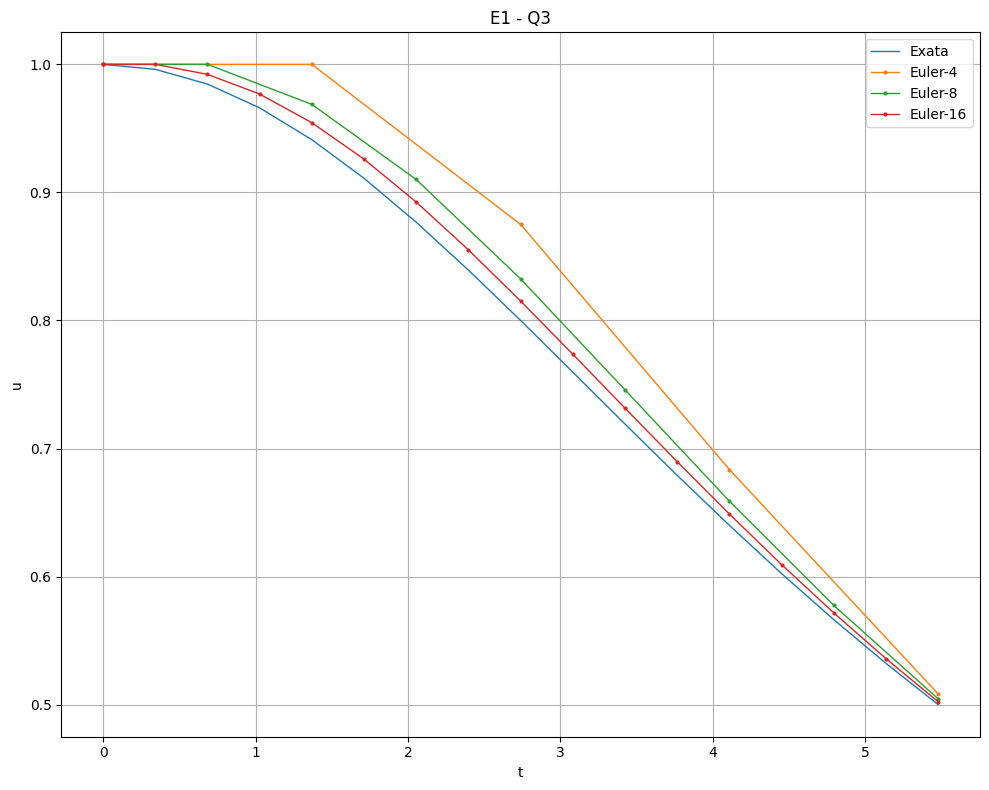

*   **Questão 4:**

A tabela foi gerado anteriormente e está apenas copiada aqui na seção de respostas:

```
+-----+--------------------+---------+------------------------+--------------------+
|  n  |      u Euler       | u Exata |        Erro Max        |       Razão        |
+-----+--------------------+---------+------------------------+--------------------+
|  2  |        0.5         |   0.5   |          0.0           |        inf         |
|  4  | 0.5083560943603516 |   0.5   |  0.008356094360351562  |        0.0         |
|  8  | 0.5045486124686074 |   0.5   | 0.0045486124686073826  |  1.83706447142328  |
|  16 | 0.5022642864188357 |   0.5   | 0.0022642864188356926  | 2.0088503074387125 |
|  32 | 0.5011213922644929 |   0.5   | 0.0011213922644929264  | 2.0191742805177655 |
|  64 | 0.5005571541057451 |   0.5   | 0.0005571541057450835  | 2.0127147102205876 |
| 128 | 0.5002775936902161 |   0.5   | 0.0002775936902160714  | 2.0070849064019067 |
| 256 | 0.5001385392778465 |   0.5   | 0.00013853927784646114 | 2.0037183283409346 |
| 512 | 0.500069203811387  |   0.5   | 6.920381138697529e-05  | 2.0019024251680935 |
+-----+--------------------+---------+------------------------+--------------------+
```

*   **Resposta:**

É possível notar que o erro se comporta sim da maneira esperada. É fácil perceber isso, pois os valores da coluna `Razão` estão tendendo à $2$ que é o valor esperado ao dobrar o valor de $n$. Isso só não adere para as 2 primeiras linhas da tabela, possívelmente por $k$ ser muito pequeno.



---



### Método de 2a ordem

Como vimos anteriormente, o método de Euler é um método de 1a ordem $O(h)$, isto é, quando reduzimos $h$ pela metade, o erro cai aproximadamente pela metade.

Podemos obter um método de segunda ordem, isto é, com erro da ordem de $h^2$, indicado por $O(h^2)$, usando o método explicito do trapézio, também conhecido como Euler Aprimorado:

$$
u_{k+1}=u_k+\frac{h}{2}\left( f(t_k, u_k)+f(t_k+h, u_k+hf(t_k, u_k))\right),
$$
que pode ser implementado em 2 estágios:
$$
\kappa_1 = f(t_k, u_k) \\
\kappa_2 = f(t_k+h, u_k+h\kappa_1)\\
u_{k+1} = u_k+\frac{h}{2}\left(\kappa_1+\kappa_2 \right)
$$

### ❗Exercício 2❗




1.  Implemente uma função de Python para o método de Euler Aprimorado, de forma similar ao feito para Euler, para um problema de Cauchy geral.

2.  Teste sua implementação para o mesmo problema do Exercíco 2:
$$
\begin{cases}
u'(t)=-2\,tu^2/a, \quad  t \ge 0\\
u(0) = 1
\end{cases},
$$
cuja solução exata é
$$
  u(t) = \frac{1}{1+t^2/a},
$$
onde $a =$ magic_int (valor do seu último dígito não nulo do número usp multiplicado por 10). Use $t_0=0$ e $T=\sqrt{a}$. Faça os testes com os mesmos valores de $n$ usados no Exercício 1: $n=2^k$, $0 \le k \le 9$.
3. Apresente um gráfico com a solução exata e as aproximações para $n = 4, 8$ e $16$.

4. Construa uma tabela apresentando, para os $10$ valores de $n$ usados, os valores da solução exata e das aproximações em $T=\sqrt{a}$, o valor absoluto dos erros em $T=\sqrt{a}$ e a razão entre estes erros para valores de $n$ consecutivos.

**Responda:**

1. O erro se comporta como esperado?
2. Um passo do Método de Euler Aprimorado usa duas avaliações de $f$, enquanto que um passo do Método de Euler usa apenas uma avaliação de $f$. Compare o número total de avaliações de $f$ em cada método para erros com a mesma ordem de grandeza (olhe a sua tabela). Compensa usar um método de ordem maior, porém mais caro em cada passo?


In [14]:
# E2-Q1: Implementar Euler Aprimorado

def metodo_euler_aprimorado(u0, t0, T, f, n):
    # Código do método de Euler Aprimorado

    # Entradas:
    # u0 ---> Estado Inicial
    # t0 ---> Tempo Inicial
    # T  ---> Tempo Final
    # f  ---> Função a ser integrada
    # n  ---> Número de subintervalos

    # Saídas:
    # Vetor de aproximações ---> u

    # Definições iniciais:
    h = (T - t0) / n    # Passo de tempo
    u = np.empty(n + 1) # Inicialização de u
    u[0] = u0           # u[0] é dado no PVI

    for k in range(0, n):
        # Loop para calcular as aproximações
        tk = t0 + k * h                       # Cálculo do próximo tk
        k1 = f(tk    , u[k])                  # Cálculo do k1
        k2 = f(tk + h, u[k] + h * k1)         # Cálculo do k2
        u[k + 1] = u[k] + (h / 2) * (k1 + k2) # Cálculo do próximo uk

    return u

In [15]:
# E2-Q2: Testar implementação

# Dados
u0 = 1.0
t0 = 0.0
T  = np.sqrt(a)

# Resolvendo para 0 <= k <= 9
resultados_aprimorado = []
for k in range(0, 10):
    n = 2 ** k
    resultados_aprimorado.append(metodo_euler_aprimorado(u0, t0, T, u_linha, n))

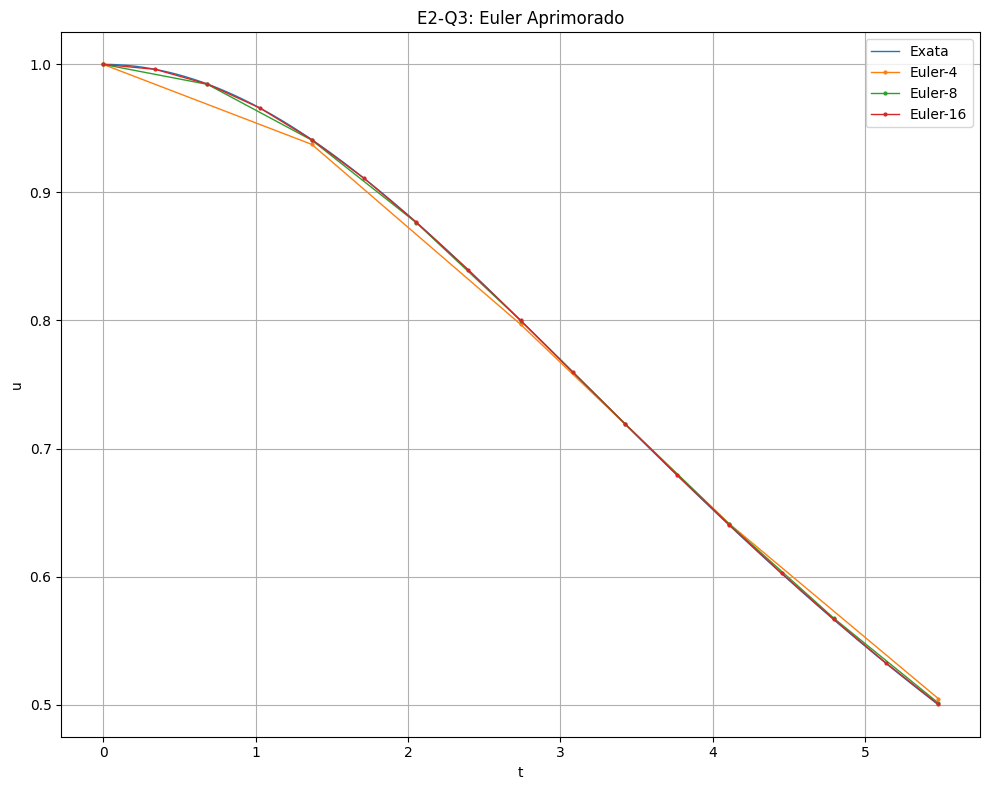

In [16]:
# E2-Q3: Apresentar um gráfico
# Código do gráfico adaptado dos professores

t = np.linspace(t0, T, n + 1)
u_exata = u_teorico(t)

figure, axs = plt.subplots(figsize=(10, 8))
plt.plot(t, u_exata, label="Exata", linewidth=1)

plt.title("E2-Q3: Euler Aprimorado")
plt.xlabel("t")
plt.ylabel("u")

# Exercício pede n = 4, 8 e 16 ==> k = 2, 3 e 4
for k in [2, 3, 4]:
    n = 2 ** k                         # Calcula n dado k
    t = np.linspace(t0, T, n + 1)      # Cria os passos temporais (x do gráfico)
    u_aprox = resultados_aprimorado[k] # Recupera valor calculado em E1-Q2
    # Cria visualização
    plt.plot(t, u_aprox, '-o', label="Euler-" + str(n), linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# E2-Q4: - Construir uma tabela
# Código da tabela adaptado dos professores

tab = PrettyTable(['n', 'u Euler', 'u Exata',  'Erro Max', "Razão"])

erro_final = []
for k in range(10):
    n = 2 ** k                         # Calcula n dado k
    t = np.linspace(t0, T, n + 1)      # Cria os passos temporais (x do gráfico)
    u_aprox = resultados_aprimorado[k] # Recupera valor calculado em E2-Q2
    u_exata = u_teorico(t)             # Calcula a solução exata

    erro_final.append(np.abs(u_aprox[-1] - u_exata[-1]))
    if n > 1 :
        tab.add_row([n, u_aprox[-1], u_exata[-1],  erro_final[-1],  erro_final[-2]/erro_final[-1]])

print(tab)

+-----+--------------------+---------+------------------------+---------------------+
|  n  |      u Euler       | u Exata |        Erro Max        |        Razão        |
+-----+--------------------+---------+------------------------+---------------------+
|  2  |   0.49951171875    |   0.5   |     0.00048828125      |        1024.0       |
|  4  | 0.5048106255815346 |   0.5   | 0.0048106255815345556  | 0.10150057237342544 |
|  8  | 0.5014093889442011 |   0.5   |  0.001409388944201062  |  3.4132704114984715 |
|  16 | 0.5003669245251361 |   0.5   | 0.00036692452513609197 |  3.841086783932802  |
|  32 | 0.5000931249352308 |   0.5   |  9.31249352308372e-05  |  3.9401318693705716 |
|  64 | 0.5000234351266839 |   0.5   | 2.3435126683901686e-05 |  3.973732955956564  |
| 128 | 0.5000058769192534 |   0.5   | 5.876919253355872e-06  |  3.987655040609861  |
| 256 | 0.5000014714332721 |   0.5   | 1.4714332721155188e-06 |  3.9940100341121614 |
| 512 | 0.5000003681299151 |   0.5   | 3.6812991510704

### Respostas Exercício 2:

*   **Questão 1:**

A implementação da função `metodo_euler_aprimorado` é muito similar ao método tradicional desenvolvido antes, apenas com a adição dos cálculos intermediários de $\kappa_1$ e $\kappa_2$

*   **Questão 2:**

Da mesma forma que em E1-Q2, cada estimativa pedida para $0 \le k \le 9$ estão contidas dentro de uma lista Python com nome `resultados_aprimorado`, cada uma das posições `resultados_aprimorado[k]` corresponde à estimativa de $u(t)$ com $2^k$ pontos. De qualquer forma os valores estão explícitos abaixo:

```
K=0
[1.0, 0.0]

K=1
[1.0, 0.75, 0.49951171875]

K=2
[1.0, 0.9375, 0.7969455420970917, 0.6411950378247205, 0.5048106255815346]

K=3
[1.0, 0.984375, 0.9407877405155887, 0.876376252020175, 0.7999361065893105, 0.7194482459354793, 0.6407814222383916, 0.5675212837413147, 0.5014093889442011]

K=4
[1.0, 0.99609375, 0.9845865498720058, 0.9659995958567624, 0.9411363841457224, 0.9109997826987555, 0.8766988820826854, 0.8393602245874446, 0.8000542573948085, 0.7597426849174923, 0.7192475356039294, 0.6792392776118935, 0.6402395113667393, 0.6026333780213582, 0.5666873563899846, 0.532569089235921, 0.5003669245251361]

K=5
[1.0, 0.9990234375, 0.9961070688950215, 0.9912847772068025, 0.9846119343370658, 0.9761638297119446, 0.9660335876607525, 0.9543296787441827, 0.9411731449868289, 0.9266946647742447, 0.9110315803799284, 0.8943250008216138, 0.8767170767055207, 0.8583485238963922, 0.8393564512788331, 0.8198725263930334, 0.800021492834288, 0.7799200360753814, 0.7596759804399508, 0.7393877895595807, 0.7191443356970264, 0.6990248994841651, 0.6790993604294683, 0.6594285394509192, 0.6400646571364652, 0.6210518749158644, 0.6024268904043505, 0.584219562491068, 0.5664535460190443, 0.5491469199424932, 0.5323127965238764, 0.5159599023759529, 0.5000931249352308]

K=6
[1.0, 0.999755859375, 0.9990242714559088, 0.9978073749509255, 0.9961087168512761, 0.9939332266585983, 0.9912871807939566, 0.9881781576656177, 0.984614983991224, 0.9806076730759332, 0.9761673558394603, 0.9713062054602434, 0.9660373565630688, 0.9603748199168726, 0.9543333936319639, 0.9479285718509626, 0.9411764519160835, 0.9340936409681879, 0.9266971628917366, 0.9190043664661295, 0.911032835519818, 0.9028003018110257, 0.8943245612799771, 0.8856233942342423, 0.8767144899431218, 0.8676153760307537, 0.8583433529725065, 0.8489154339167121, 0.8393482899751601, 0.8296582010520936, 0.8198610122135273, 0.8099720955371839, 0.8000063173286169, 0.7899780105413616, 0.7799009521982944, 0.7697883455776583, 0.7596528069001999, 0.749506356233216, 0.7393604123126123, 0.7292257909748254, 0.719112706886158, 0.7090307782571453, 0.6989890342334809, 0.6889959246622115, 0.6790593319418466, 0.6691865846772059, 0.6593844728737722, 0.6496592644216046, 0.6400167226350862, 0.6304621246315956, 0.6210002803492802, 0.6116355520212143, 0.6023718739401062, 0.5932127723642, 0.5841613854309338, 0.5752204829601475, 0.5663924860430933, 0.5576794863271121, 0.5490832649185643, 0.5406053108384189, 0.5322468389757917, 0.5240088074947067, 0.515891934658435, 0.5078967150439835, 0.5000234351266839]

K=7
[1.0, 0.99993896484375, 0.9997559115211069, 0.9994509740320695, 0.9990243754348408, 0.9984764274382099, 0.9978075298328364, 0.9970181697633727, 0.9961089208438914, 0.9950804421196093, 0.993933476878402, 0.9926688513160892, 0.9912874730599386, 0.9897903295552717, 0.9881784863204764, 0.9864530850761143, 0.9846153417541701, 0.9826665443938195, 0.9806080509303836, 0.9784412868844024, 0.9761677429579854, 0.9737889725457924, 0.9713065891681533, 0.968722263833959, 0.9660377223410459, 0.9632547425218455, 0.9603751514420931, 0.9574008225603744, 0.9543336728562432, 0.951175659934564, 0.9479287791136287, 0.9445950605044595, 0.941176566088547, 0.9376753868010869, 0.934093639626565, 0.9304334647133118, 0.9266970225133914, 0.9228864909539238, 0.919004062645654, 0.9150519421342806, 0.9110323431997503, 0.906947486208403, 0.9027995955225255, 0.8985908969715409, 0.8943236153887228, 0.8899999722169867, 0.885622183186972, 0.8811924560702922, 0.8767129885104966, 0.8721859659339567, 0.8676135595425695, 0.862997924389851, 0.8583411975416876, 0.8536454963227116, 0.8489129166489814, 0.8441455314473667, 0.8393453891617754, 0.834514512346103, 0.829654896343547, 0.8247685080516999, 0.819857284772618, 0.8149231331468696, 0.8099679281703712, 0.8049935122926536, 0.800001694595038, 0.794994250047059, 0.7899729188393377, 0.7849394057909909, 0.7798953798295563, 0.7748424735413233, 0.7697822827898738, 0.7647163664005742, 0.7596462459086982, 0.7545734053688181, 0.7494992912230612, 0.7444253122258077, 0.7393528394223855, 0.7342832061793129, 0.7292177082636379, 0.7241576039689342, 0.719104114285528, 0.7140584231125507, 0.7090216775094456, 0.7039949879845842, 0.6989794288186937, 0.6939760384208359, 0.6889858197147276, 0.6840097405532457, 0.6790487341590117, 0.674103699589011, 0.6691755022212603, 0.6642649742616007, 0.6593729152687537, 0.6545000926958483, 0.6496472424466869, 0.6448150694450899, 0.6400042482157212, 0.6352154234748679, 0.6304492107297115, 0.6257061968846963, 0.620986940853667, 0.6162919741765105, 0.6116218016391054, 0.6069769018954423, 0.6023577280908426, 0.5977647084852649, 0.5931982470757439, 0.5886587242170717, 0.5841464972398802, 0.5796619010653444, 0.5752052488157761, 0.5707768324204299, 0.566376923215895, 0.56200577254049, 0.5576636123221299, 0.5533506556591729, 0.5490670973938014, 0.5448131146775316, 0.540588867528482, 0.5363944993800743, 0.532230137620869, 0.5280958941252767, 0.5239918657749159, 0.5199181349704189, 0.5158747701335177, 0.5118618261992648, 0.5078793450982763, 0.5039273562289016, 0.5000058769192534]

K=8
[1.0, 0.9999847412109375, 0.9999389681032547, 0.9998626890571283, 0.9997559180352155, 0.9996186745762652, 0.9994509837861825, 0.9992528763265518, 0.9990243884006308, 0.9987655617368254, 0.9984764435696605, 0.9981570866182626, 0.9978075490623731, 0.9974278945159113, 0.9970181919981104, 0.9965785159022512, 0.9961089459620194, 0.9956095672155137, 0.9950804699669376, 0.9945217497460036, 0.9939335072650871, 0.9933158483741626, 0.9926688840135613, 0.9919927301645892, 0.9912875077980452, 0.9905533428206824, 0.9897903660196563, 0.9889987130050046, 0.9881785241502059, 0.9873299445308639, 0.9864531238615684, 0.985548216430982, 0.9846153810352042, 0.9836547809094661, 0.9826665836582098, 0.9816509611836054, 0.9806080896125632, 0.9795381492222965, 0.9784413243644922, 0.9773178033881464, 0.9761677785611256, 0.9749914459905089, 0.9737890055417748, 0.9725606607568889, 0.9713066187713547, 0.9700270902302881, 0.9687222892035745, 0.9673924331001718, 0.9660377425816176, 0.9646584414748043, 0.9632547566840807, 0.9618269181027415, 0.9603751585239663, 0.9588997135512667, 0.9574008215085031, 0.95587872334953, 0.954333662567528, 0.9527658851040853, 0.9511756392580807, 0.9495631755944315, 0.9479287468527602, 0.9462726078560368, 0.9445950154192533, 0.9428962282581834, 0.9411765068982837, 0.9394361135837871, 0.9376753121870427, 0.9358943681181522, 0.9340935482349533, 0.9322731207533995, 0.9304333551583848, 0.9285745221150596, 0.9266968933806852, 0.9248007417170692, 0.922886340803629, 0.920953965151123, 0.9190038900160922, 0.9170363913160512, 0.9150517455454696, 0.9130502296925784, 0.9110321211570398, 0.9089976976685146, 0.906947237206161, 0.9048810179190974, 0.9027993180478593, 0.9007024158468817, 0.8985905895080336, 0.8964641170852333, 0.8943232764201688, 0.8921683450691493, 0.8899996002311092, 0.8878173186767885, 0.8856217766791072, 0.8834132499447571, 0.881192013547024, 0.8789583418598612, 0.8767125084932273, 0.8744547862297032, 0.8721854469624009, 0.8699047616341765, 0.8676130001781569, 0.8653104314595902, 0.8629973232190276, 0.860673942016844, 0.8583405531791028, 0.8559974207447705, 0.8536448074142827, 0.8512829744994675, 0.8489121818748244, 0.8465326879301612, 0.8441447495245878, 0.8417486219418664, 0.8393445588471136, 0.8369328122448542, 0.8345136324384193, 0.8320872679906866, 0.8296539656861545, 0.8272139704943455, 0.8247675255345299, 0.8223148720417621, 0.819856249334221, 0.8173918947818439, 0.8149220437762452, 0.8124469297019066, 0.8099667839086291, 0.8074818356852345, 0.8049923122345021, 0.8024984386493296, 0.8000004378901022, 0.7974985307632574, 0.7949929359010288, 0.7924838697423565, 0.7899715465149457, 0.7874561782184588, 0.784937974608825, 0.7824171431836497, 0.7798938891687082, 0.7773684155055037, 0.7748409228398763, 0.77231160951164, 0.7697806715452347, 0.7672483026413711, 0.7647146941696527, 0.762180035162154, 0.7596445123079395, 0.7571083099485002, 0.7545716100740932, 0.7520345923209621, 0.7494974339694209, 0.7469603099427814, 0.7444233928071056, 0.7418868527717632, 0.7393508576907765, 0.7368155730649304, 0.7342811620446332, 0.7317477854335045, 0.7292156016926735, 0.7266847669457694, 0.7241554349845831, 0.7216277572753826, 0.7191018829658639, 0.7165779588927175, 0.7140561295897941, 0.7115365372968493, 0.7090193219688499, 0.7065046212858248, 0.703992570663242, 0.7014833032628932, 0.6989769500042711, 0.6964736395764194, 0.6939734984502407, 0.6914766508912443, 0.6889832189727181, 0.6864933225893075, 0.684007079470986, 0.6815246051974013, 0.6790460132125804, 0.6765714148399804, 0.6741009192978678, 0.6716346337150118, 0.6691726631466782, 0.6667151105909083, 0.664262077005068, 0.6618136613226555, 0.6593699604703518, 0.6569310693853013, 0.6544970810326103, 0.6520680864230484, 0.6496441746309427, 0.6472254328122509, 0.644811946222801, 0.6424037982366878, 0.6400010703648116, 0.6376038422735504, 0.6352121918035537, 0.6328261949886468, 0.6304459260748351, 0.6280714575393987, 0.6257028601100674, 0.6233402027842648, 0.6209835528484146, 0.6186329758972972, 0.6162885358534496, 0.6139502949865989, 0.6116183139331212, 0.6092926517155165, 0.6069733657618948, 0.6046605119254608, 0.6023541445039945, 0.6000543162593168, 0.5977610784367349, 0.5954744807844594, 0.5931945715729884, 0.5909213976144494, 0.5886550042818957, 0.5863954355285482, 0.5841427339069806, 0.5818969405882377, 0.5796580953808865, 0.5774262367499906, 0.5752014018360052, 0.5729836264735878, 0.570772945210319, 0.5685693913253294, 0.5663729968478293, 0.5641837925755351, 0.5620018080929907, 0.5598270717897784, 0.5576596108786165, 0.5554994514133407, 0.5533466183067647, 0.5512011353484185, 0.5490630252221601, 0.5469323095236582, 0.544809008777744, 0.5426931424556284, 0.5405847289919835, 0.5384837858018849, 0.5363903292976135, 0.5343043749053147, 0.5322259370815129, 0.5301550293294803, 0.5280916642154571, 0.5260358533847226, 0.5239876075775163, 0.5219469366448056, 0.5199138495639021, 0.5178883544539219, 0.5158704585910925, 0.5138601684239021, 0.5118574895880936, 0.5098624269214996, 0.5078749844787208, 0.505895165545645, 0.5039229726538074, 0.5019584075945919, 0.5000014714332721]

K=9
[1.0, 0.9999961853027344, 0.9999847414146624, 0.999965668859626, 0.9999389685106279, 0.9999046415897316, 0.9998626896679215, 0.9998131146649233, 0.9997559188489845, 0.9996911048366149, 0.9996186755922875, 0.9995386344280992, 0.9994509850033931, 0.9993557313243402, 0.9992528777434815, 0.9991424289592318, 0.9990243900153434, 0.9988987663003308, 0.9987655635468567, 0.9986247878310788, 0.9984764455719577, 0.9983205435305271, 0.9981570888091245, 0.9979860888505838, 0.9978075514373909, 0.9976214846907995, 0.9974278970699109, 0.9972267973707152, 0.9970181947250956, 0.9968020985997954, 0.9965785187953483, 0.9963474654449714, 0.9961089490134226, 0.9958629802958211, 0.9956095704164323, 0.9953487308274168, 0.9950804733075441, 0.9948048099608708, 0.9945217532153844, 0.9942313158216116, 0.9939335108511934, 0.9936283516954252, 0.9933158520637636, 0.9929960259822999, 0.9926688877921995, 0.9923344521481103, 0.9919927340165368, 0.9916437486741826, 0.9912875117062623, 0.99092403900478, 0.9905533467667781, 0.9901754514925547, 0.9897903699838507, 0.9893981193420074, 0.9889987169660932, 0.9885921805510028, 0.9881785280855258, 0.9877577778503875, 0.9873299484162624, 0.9868950586417582, 0.986453127671374, 0.9860041749334312, 0.9855482201379769, 0.9850852832746634, 0.9846153846105993, 0.9841385446881777, 0.9836547843228783, 0.9831641246010453, 0.9826665868776415, 0.982162192773979, 0.9816509641754264, 0.9811329232290937, 0.9806080923414948, 0.9800764941761886, 0.9795381516513979, 0.978993087937609, 0.978441326455149, 0.9778828908717451, 0.9773178051000624, 0.9767460932952247, 0.9761677798523152, 0.97558288940386, 0.9749914468172937, 0.9743934771924074, 0.9737890058587813, 0.9731780583731992, 0.9725606605170491, 0.9719368382937076, 0.9713066179259091, 0.9706700258531021, 0.9700270887287903, 0.9693778334178605, 0.9687222869938987, 0.9680604767364926, 0.9673924301285225, 0.966718174853441, 0.9660377387925415, 0.9653511500222163, 0.9646584368112043, 0.9639596276178299, 0.963254751087232, 0.9625438360485848, 0.9618269115123105, 0.9611040066672839, 0.9603751508780306, 0.9596403736819176, 0.958899704786338, 0.9581531740658904, 0.9574008115595518, 0.9566426474678468, 0.9558787121500115, 0.9551090361211543, 0.9543336500494122, 0.9535525847531048, 0.9527658711978857, 0.9519735404938912, 0.9511756238928877, 0.950372152785418, 0.9495631586979462, 0.9487486732900029, 0.9479287283513301, 0.9471033557990265, 0.9462725876746937, 0.9454364561415844, 0.9445949934817517, 0.9437482320932005, 0.9428962044870419, 0.9420389432846509, 0.9411764812148266, 0.940308851110957, 0.9394360859081881, 0.9385582186405967, 0.93767528243837, 0.9367873105249879, 0.9358943362144144, 0.9349963929082926, 0.9340935140931472, 0.9331857333375945, 0.9322730842895585, 0.9313556006734959, 0.9304333162876284, 0.9295062650011835, 0.9285744807516444, 0.9276379975420086, 0.9266968494380562, 0.9257510705656278, 0.9248006951079127, 0.9238457573027476, 0.9228862914399258, 0.9219223318585176, 0.9209539129442023, 0.9199810691266117, 0.919003834876686, 0.9180222447040414, 0.9170363331543505, 0.9160461348067366, 0.9150516842711794, 0.914053016185936, 0.9130501652149743, 0.912043166045421, 0.9110320533850242, 0.9100168619596302, 0.9089976265106744, 0.907974381792689, 0.9069471625708242, 0.9059160036183862, 0.9048809397143904, 0.9038420056411306, 0.9027992361817647, 0.9017526661179167, 0.9007023302272955, 0.8996482632813302, 0.8985905000428228, 0.8975290752636187, 0.8964640236822932, 0.8953953800218573, 0.8943231789874801, 0.8932474552642304, 0.8921682435148353, 0.8910855783774575, 0.8899994944634922, 0.8889100263553812, 0.8878172086044464, 0.8867210757287426, 0.8856216622109293, 0.8845190024961614, 0.8834131309899996, 0.8823040820563404, 0.8811918900153651, 0.8800765891415102, 0.8789582136614554, 0.8778367977521334, 0.8767123755387591, 0.8755849810928789, 0.8744546484304404, 0.8733214115098827, 0.872185304230247, 0.8710463604293073, 0.8699046138817224, 0.8687600982972083, 0.8676128473187316, 0.8664628945207224, 0.8653102734073107, 0.8641550174105808, 0.8629971598888485, 0.861836734124959, 0.8606737733246052, 0.8595083106146679, 0.8583403790415769, 0.8571700115696924, 0.855997241079709, 0.8548221003670795, 0.8536446221404612, 0.8524648390201823, 0.85128278353673, 0.8500984881292598, 0.848911985144126, 0.8477233068334334, 0.8465324853536101, 0.8453395527640016, 0.8441445410254862, 0.842947481999111, 0.8417484074447498, 0.8405473490197813, 0.8393443382777894, 0.8381394066672831, 0.8369325855304389, 0.8357239061018629, 0.8345133995073745, 0.833301096762811, 0.8320870287728531, 0.83087122632987, 0.8296537201127866, 0.8284345406859711, 0.8272137184981424, 0.8259912838812988, 0.8247672670496669, 0.8235416980986703, 0.82231460700392, 0.8210860236202234, 0.8198559776806146, 0.818624498795404, 0.8173916164512488, 0.8161573600102422, 0.8149217587090233, 0.8136848416579066, 0.8124466378400305, 0.8112071761105261, 0.809966485195705, 0.8087245936922667, 0.8074815300665242, 0.8062373226536507, 0.804991999656943, 0.8037455891471059, 0.8024981190615538, 0.8012496172037316, 0.8000001112424543, 0.7987496287112649, 0.7974981970078104, 0.7962458433932367, 0.7949925949916002, 0.7937384787892993, 0.7924835216345215, 0.7912277502367107, 0.7899711911660496, 0.7887138708529616, 0.7874558155876287, 0.7861970515195269, 0.7849376046569795, 0.7836775008667257, 0.782416765873508, 0.7811554252596741, 0.7798935044647972, 0.7786310287853117, 0.777368023374165, 0.7761045132404863, 0.7748405232492706, 0.7735760781210782, 0.7723112024317514, 0.7710459206121452, 0.7697802569478737, 0.7685142355790726, 0.767247880500176, 0.765981215559708, 0.76471426446009, 0.763447050757462, 0.7621795978615183, 0.7609119290353585, 0.7596440673953513, 0.7583760359110137, 0.7571078574049034, 0.7558395545525253, 0.7545711498822513, 0.753302665775254, 0.7520341244654534, 0.750765548039477, 0.7494969584366329, 0.7482283774488953, 0.7469598267209037, 0.7456913277499742, 0.7444229018861225, 0.7431545703321008, 0.7418863541434451, 0.7406182742285359, 0.7393503513486698, 0.7380826061181432, 0.7368150590043477, 0.7355477303278765, 0.734280640262642, 0.733013808836005, 0.7317472559289145, 0.7304810012760584, 0.7292150644660246, 0.7279494649414728, 0.7266842219993173, 0.7254193547909182, 0.7241548823222851, 0.7228908234542885, 0.7216271969028826, 0.7203640212393366, 0.7191013148904764, 0.7178390961389347, 0.7165773831234113, 0.7153161938389417, 0.714055546137175, 0.7127954577266603, 0.7115359461731422, 0.7102770288998641, 0.7090187231878806, 0.7077610461763777, 0.7065040148630011, 0.7052476461041924, 0.7039919566155337, 0.7027369629720988, 0.7014826816088128, 0.700229128820819, 0.6989763207638527, 0.6977242734546225, 0.6964730027711983, 0.6952225244534064, 0.6939728541032314, 0.6927240071852246, 0.6914759990269189, 0.6902288448192501, 0.6889825596169841, 0.6877371583391512, 0.686492655769485, 0.6852490665568686, 0.6840064052157849, 0.6827646861267747, 0.6815239235368977, 0.6802841315602014, 0.6790453241781934, 0.6778075152403197, 0.6765707184644479, 0.6753349474373556, 0.6741002156152224, 0.6728665363241286, 0.6716339227605564, 0.6704023879918972, 0.6691719449569618, 0.667942606466496, 0.6667143852037001, 0.6654872937247518, 0.6642613444593336, 0.6630365497111638, 0.6618129216585311, 0.6605904723548335, 0.6593692137291192, 0.6581491575866325, 0.6569303156093622, 0.6557126993565932, 0.654496320265461, 0.65328118965151, 0.6520673187092542, 0.6508547185127397, 0.6496434000161122, 0.648433374054185, 0.6472246513430103, 0.6460172424804536, 0.6448111579467687, 0.6436064081051772, 0.6424030032024481, 0.6412009533694808, 0.6400002686218893, 0.6388009588605892, 0.6376030338723853, 0.6364065033305618, 0.6352113767954745, 0.6340176637151428, 0.6328253734258455, 0.6316345151527165, 0.630445098010342, 0.6292571310033591, 0.6280706230270563, 0.6268855828679737, 0.6257020192045053, 0.6245199406075018, 0.6233393555408745, 0.6221602723621996, 0.620982699323324, 0.6198066445709707, 0.6186321161473459, 0.6174591219907458, 0.6162876699361641, 0.6151177677159002, 0.6139494229601674, 0.6127826431977015, 0.6116174358563693, 0.6104538082637778, 0.6092917676478831, 0.6081313211375992, 0.6069724757634071, 0.6058152384579639, 0.6046596160567111, 0.6035056152984832, 0.602353242826116, 0.6012025051870544, 0.6000534088339601, 0.5989059601253182, 0.5977601653260443, 0.5966160306080903, 0.5954735620510502, 0.5943327656427642, 0.5931936472799236, 0.5920562127686739, 0.5909204678252175, 0.5897864180764152, 0.5886540690603875, 0.5875234262271147, 0.5863944949390356, 0.5852672804716456, 0.5841417880140937, 0.5830180226697788, 0.5818959894569439, 0.58077569330927, 0.5796571390764687, 0.5785403315248725, 0.5774252753380259, 0.576311975117273, 0.5752004353823448, 0.5740906605719455, 0.572982655044336, 0.5718764230779176, 0.5707719688718129, 0.5696692965464456, 0.5685684101441192, 0.5674693136295932, 0.5663720108906585, 0.5652765057387105, 0.5641828019093211, 0.5630909030628086, 0.5620008127848058, 0.5609125345868268, 0.5598260719068311, 0.5587414281097871, 0.557658606488233, 0.5565776102628353, 0.5554984425829467, 0.5544211065271614, 0.5533456051038679, 0.552271941251801, 0.5512001178405909, 0.5501301376713102, 0.5490620034770204, 0.5479957179233138, 0.5469312836088556, 0.5458687030659227, 0.5448079787609411, 0.54374911309502, 0.5426921084044855, 0.5416369669614102, 0.5405836909741423, 0.5395322825878314, 0.5384827438849527, 0.5374350768858286, 0.5363892835491483, 0.5353453657724848, 0.5343033253928101, 0.5332631641870078, 0.5322248838723834, 0.5311884861071726, 0.5301539724910469, 0.5291213445656168, 0.5280906038149332, 0.527061751665986, 0.5260347894892005, 0.5250097185989311, 0.5239865402539534, 0.5229652556579528, 0.5219458659600118, 0.5209283722550941, 0.5199127755845266, 0.5188990769364791, 0.517887277246441, 0.5168773773976967, 0.515869378221797, 0.5148632804990296, 0.5138590849588859, 0.512856792280526, 0.5118564030932415, 0.5108579179769147, 0.5098613374624766, 0.5088666620323619, 0.5078738921209609, 0.5068830281150704, 0.5058940703543404, 0.5049070191317198, 0.5039218746938983, 0.502938637241747, 0.5019573069307559, 0.5009778838714686, 0.5000003681299151]
```

*   **Questão 3:**

O gráfico foi gerado anteriormente e está apenas copiado aqui na seção de respostas, ele mostra os valores pedidos para $n = 4, 8$ e $16$:

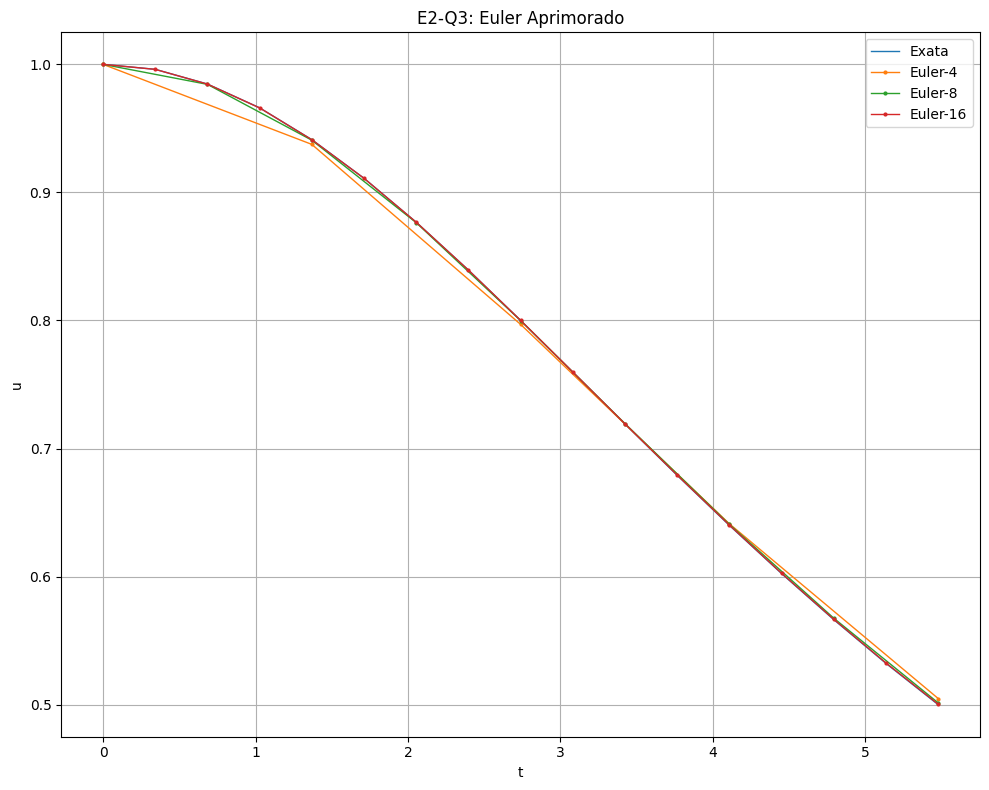

*   **Questão 4:**

A tabela foi gerado anteriormente e está apenas copiada aqui na seção de respostas:

```
+-----+--------------------+---------+------------------------+---------------------+
|  n  |      u Euler       | u Exata |        Erro Max        |        Razão        |
+-----+--------------------+---------+------------------------+---------------------+
|  2  |   0.49951171875    |   0.5   |     0.00048828125      |        1024.0       |
|  4  | 0.5048106255815346 |   0.5   | 0.0048106255815345556  | 0.10150057237342544 |
|  8  | 0.5014093889442011 |   0.5   |  0.001409388944201062  |  3.4132704114984715 |
|  16 | 0.5003669245251361 |   0.5   | 0.00036692452513609197 |  3.841086783932802  |
|  32 | 0.5000931249352308 |   0.5   |  9.31249352308372e-05  |  3.9401318693705716 |
|  64 | 0.5000234351266839 |   0.5   | 2.3435126683901686e-05 |  3.973732955956564  |
| 128 | 0.5000058769192534 |   0.5   | 5.876919253355872e-06  |  3.987655040609861  |
| 256 | 0.5000014714332721 |   0.5   | 1.4714332721155188e-06 |  3.9940100341121614 |
| 512 | 0.5000003681299151 |   0.5   | 3.681299151070405e-07  |  3.997048899673564  |
+-----+--------------------+---------+------------------------+---------------------+
```

*   **Respostas:**

**Resposta 1 -** Diferentemente do Método de Euler tradicional, podemos notar que a razão do erro dessa vez vai se aproximando de $4$, isso está de acordo com o resultado teórico. Foi dito que o erro no Método de Euler aproximado é da ordem de $h^2$, mas assim como antes se realizamos uma iteração no método $k \rightarrow k+1 \implies n \rightarrow 2 \cdot n \implies h \rightarrow \frac{h}{2}$, porém como o erro dessa vez é quadrático se dividirmos o erro iterado pelo erro teremos $\frac{E_{k + 1}}{E_{k}} \approx \frac{(h)^2}{(\frac{h}{2})^2} = \frac{h^2}{\frac{h^2}{4}} = 4$. Que foi constatado na prática.

**Resposta 2 -** Para o método de Euler tradicional a coluna $n$ da tabela representa o número de avaliações da função $f$, enquanto para o método de Euler Aprimorado o número de avaliações da função $f$ é $2 \cdot n$. Criei uma tabela autoral para $2 \le k \le 20$ para analisarmos a relação de número de avaliações de $f$ com Erro. Observe que na coluna Razão, é calculado $Razão = \frac{Erro_{Euler}}{Erro_{Aprimorado}}$ e podemos ver que essa razão aproximadamente duplica a cada linha da tabela. Dessa forma podemos concluir que o método de Euler Aprimorado é vantajoso, pois para um mesmo número de chamados da função $f$ é consideravelmente menor, essa discrepância é acentuada ao se aumetar o valor de $k$.

```
+----+---------+--------------------+------------------------+-------------------------+------------------------+-----------------------------+
| k  |    n    | # Chamados f Euler |       Erro Euler       | # Chamados f Aprimorado |    Erro Aprimorado     | Razão Erro Euler/Aprimorado |
+----+---------+--------------------+------------------------+-------------------------+------------------------+-----------------------------+
| 2  |    4    |         4          |  0.008356094360351562  |            8            | 0.0048106255815345556  |      1.7370078420624095     |
| 3  |    8    |         8          | 0.0045486124686073826  |            16           |  0.001409388944201062  |      3.2273649423196282     |
| 4  |    16   |         16         | 0.0022642864188356926  |            32           | 0.00036692452513609197 |      6.170986848033314      |
| 5  |    32   |         32         | 0.0011213922644929264  |            64           |  9.31249352308372e-05  |      12.041804503951921     |
| 6  |    64   |         64         | 0.0005571541057450835  |           128           | 2.3435126683901686e-05 |      23.774315934370858     |
| 7  |   128   |        128         | 0.0002775936902160714  |           256           | 5.876919253355872e-06  |      47.23455917104157      |
| 8  |   256   |        256         | 0.00013853927784646114 |           512           | 1.4714332721155188e-06 |      94.15260649045915      |
| 9  |   512   |        512         | 6.920381138697529e-05  |           1024          | 3.681299151070405e-07  |      187.98747003989885     |
| 10 |   1024  |        1024        | 3.458527118160859e-05  |           2048          | 9.206619322466025e-08  |      375.65657892700625     |
| 11 |   2048  |        2048        | 1.7288454872255166e-05 |           4096          |  2.30207485296674e-08  |      750.9944713559211      |
| 12 |   4096  |        4096        | 8.643179502332288e-06  |           8192          | 5.7557117960627124e-09 |      1501.6699599595647     |
| 13 |   8192  |        8192        | 4.321327422673882e-06  |          16384          | 1.4389929248181943e-09 |      3003.0220080615395     |
| 14 |  16384  |       16384        | 2.1605980897732024e-06 |          32768          | 3.597575570779554e-10  |      6005.705918513965      |
| 15 |  32768  |       32768        | 1.0802826323486059e-06 |          65536          | 8.993772393495192e-11  |      12011.451758885158     |
| 16 |  65536  |       65536        | 5.401372117352921e-07  |          131072         | 2.248556896233822e-11  |      24021.505199178402     |
| 17 |  131072 |       131072       | 2.7006757619130184e-07 |          262144         | 5.627387444917531e-12  |      47991.644228303114     |
| 18 |  262144 |       262144       | 1.3503353468724555e-07 |          524288         | 1.3923306951824088e-12 |      96983.80934534725      |
| 19 |  524288 |       524288       | 6.751671088878197e-08  |         1048576         |  3.43836070726411e-13  |      196363.08298353245     |
| 20 | 1048576 |      1048576       | 3.375837465124931e-08  |         2097152         | 8.848477506262498e-14  |      381516.1944792974      |
+----+---------+--------------------+------------------------+-------------------------+------------------------+-----------------------------+
```



---



## Pêndulo simples

A maior parte das aplicações interessantes baseadas em equações diferenciais são modeladas com equações de ordens mais altas (derivadas segundas, terceiras, ...) ou vem de sistemas de equações de equações diferenciais. Vejamos um exemplo, o do pêndulo simples.

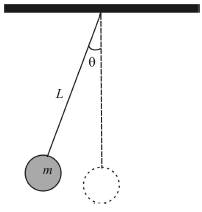

Um pêndulo simples consiste em um fio de comprimento $L$ e massa desprezível com uma extremidade fixada e outra amarrada em uma massa pontual $m$. O ângulo $\theta(t)$ que a massa faz com o eixo vertical sob ação da aceleração da gravidade $g$, sem atrito, satisfaz a seguinte equação diferencial ordinária

$$
\theta''(t) = -\frac{g}{L}\sin(\theta(t)).
$$

Gostaríamos de resolver este problema numericamente. Para isso, consideramos uma variável $\omega = \theta\,'$, a velocidade angular, e obtemos o seguinte sistema de equações de primeira ordem

\begin{align}
\theta'(t) &= \omega(t)\\
\omega'(t) &= -\frac{g}{L}\sin(\theta(t)).
\end{align}


Para usar os métodos numéricos precisamos agora definir o problema de forma vetorial,

$$
u'=f(t,u),
$$
onde
$$
u = [\theta, \omega],
$$
e
$$
f(t,u) = [ f_1(t,u), f_2(t,u) ] =  [\omega, -\frac{g}{L}\sin(\theta)].
$$

In [18]:
#Definição do problema
t0 = 0. #Tempo inicial
T = 8.  #Tempo final
u0 = np.array([np.pi/6 , 0.]) # posição angular inicial (theta0) e velocidade angular inicial (omega0)
g = 24.79 #Aceleração da gravidade (Jupiter = 24.79 , Terra = 9.81)
L = 1.2 #comprimento do fio (metros)
n = 1000 #Número de passos que daremos no tempo

def f(t, u): #note que essa função agora recebe um vetor [theta, w] e devolve um vetor [f1(theta, w), f2(theta, w)]
  return np.array([u[1], -(g/L)*np.sin(u[0])])

Podemos (devemos!) ajustar o nosso código para ele ser vetorial. Mas nota que ele só precisa saber quem é $u$ e $f$, e vale para outros sistemas de equações diferenciais ordiárias se mudarmos $u$ e $f$.

Abaixo mostramos um exemplo de um método conhecido como Runge-Kutta 44,


\begin{align}
κ_1 &= f(t_k,u_k), \\
κ_2 &= f\left(t_k + \frac{h}{2} ,u_k + \frac{h}{2}\kappa_1 \right), \\
κ_3 &= f\left(t_k + \frac{h}{2} ,u_k + \frac{h}{2}\kappa_2 \right), \\
κ_4 &= f\left(t_k + h ,u_k + h\kappa_3 \right), \\
\end{align}

$$
u_{k+1}=u_{k}+\frac{h}{6}(\kappa_1 + 2\kappa_2 + 2\kappa_3+ \kappa_4).
$$

In [19]:
## O método de Runge-Kutta 4 4 vetorial
def rk44_vet(u0, t0, T, f, n):
  h = (T-t0)/n
  dim = u0.size
  u = np.empty((n+1,dim))
  u[0, :] = u0
  for k in range(0,n):
    tk = t0+k*h
    kappa1 = f(tk, u[k, :])
    kappa2 = f(tk+h/2, u[k, :]+h*kappa1/2)
    kappa3 = f(tk+h/2, u[k, :]+h*kappa2/2)
    kappa4 = f(tk+h, u[k, :]+h*kappa3)
    u[k+1, :]=u[k, :]+h * (kappa1+2*kappa2+2*kappa3+kappa4)/6.0
    #print(k, u[k,:])
    if np.max(np.max(u[k, :])) > 10e5:
      print("Método instável...desisto!")
      return u
  return u

Vejamos a solução do prolema ao longo do tempo (nas duas variáveis, $\theta$ e $\omega=\theta'$). Note que o ângulo está em radianos.

Text(0.5, 1.0, 'Solução do problema')

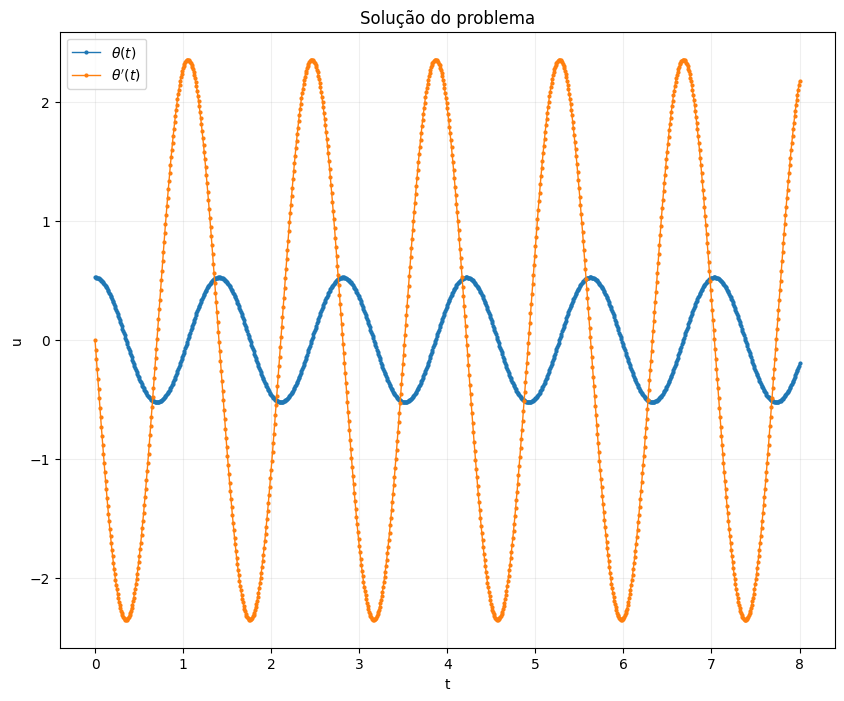

In [20]:
u_sol = rk44_vet(u0, t0, T, f, n);

t = np.linspace(t0, T, n+1)
figure, axs = plt.subplots(figsize=(10,8))
plt.xlabel("t")
plt.ylabel("u")
plt.plot(t, u_sol[:,0], '-o', label=r"$\theta(t)$", linewidth=1, markersize=2)
plt.plot(t, u_sol[:,1], '-o', label=r"$\theta'(t)$", linewidth=1, markersize=2)
plt.legend()
plt.grid(alpha=0.2)
plt.title("Solução do problema")

Podemos fazer o gráfico das soluções no plano $\theta \times \omega$, esboçando assim uma trajetória no retrato de fases do sistema de EDOs. Notamos que parece que a trajetória tem uma periodicidade, com o sistema retornando ao estado inicial passado um certo tempo.

Text(0.5, 1.0, "Curva $\\theta(t) \\times \\theta'(t)$")

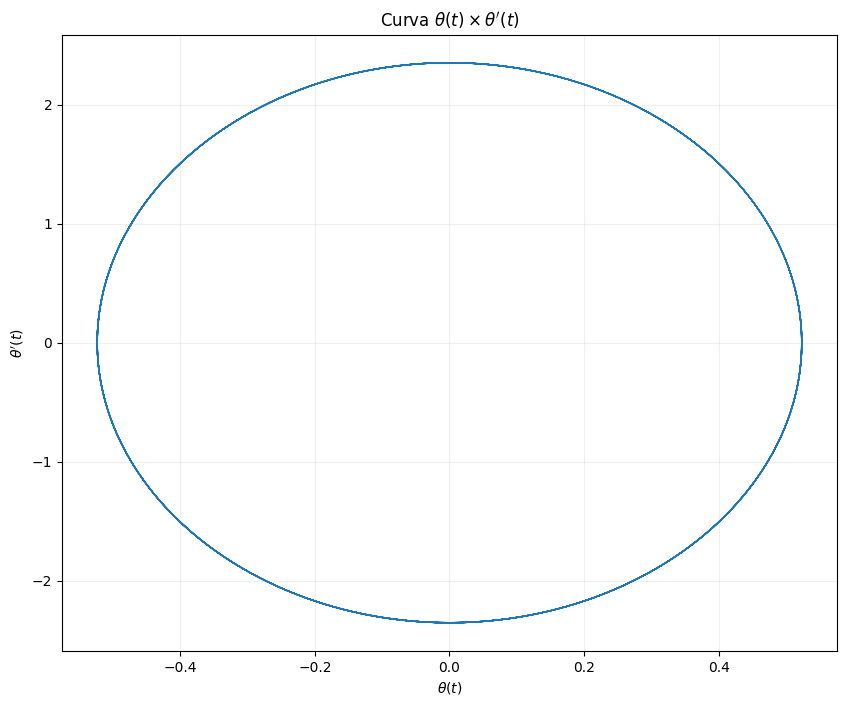

In [21]:
figure, axs = plt.subplots(figsize=(10,8))
plt.xlabel(r"$\theta(t)$")
plt.ylabel(r"$\theta'(t)$")
plt.plot(u_sol[:,0], u_sol[:,1], '-o', linewidth=1, markersize=0)
plt.grid(alpha=0.2)
plt.title(r"Curva $\theta(t) \times \theta'(t)$")



---



##O método de Runge-Kutta-Fehlberg

Os métodos númericos para resolução de equações diferenciais ordinárias fazem uso de um espaçamento $h$ no tempo a cada passo. A precisão atingida pelo método depende deste valor de $h$. Neste sentido, descrevemos uma técnica para melhorar a precisão de forma eficiente.

Considere dois métodos numéricos, um de ordem $p$, e outro de ordem $p+1$, que a partir do valor $x_i$ geram a aproximação para $x(t_{i+1})$ respectivamente como:

\begin{align}
x_{i+1} &= x_i +  h\,\Phi(t_i,x_i,h) \quad \text{e }\\
\tilde{x}_{i+1} &= x_i +  h\,\tilde{\Phi}(t_i,x_i,h).
\end{align}

Assumindo que a aproximação $x_i$ no instante $t_i$ seja praticamente igual à solução $x(t_i)$, o erro de truncamento para o método de ordem $p$ pode ser escrito como

$$
\tau_{i+1}(h) = \frac{\tilde{x}_{i+1} - x_{i+1}}{h}.
$$

Por meio desta expressão, pode-se estimar o erro de truncamento e verificar se este se encontra dentro da ordem de precisão desejada e se é necessário aumentar ou reduzir o espaçamento $h$. Usando que

$$
\tau_{i+1}(h) \approx Ch^p
$$

onde $C \in \mathbb{R}$ e se utilizarmos um novo espaçamento $\tilde{h} = \alpha h$, teríamos

$$
\tau_{i+1}(h) ≈ C(\alpha h)^p ≈ \alpha^p \tau_{i+1}(h)  \approx \alpha^p \frac{\tilde{x}_{i+1} - x_{i+1}}{h}.
$$

Como desejamos que a norma do erro de truncamento seja menor que uma tolerância $ɛ$, devemos ter

$$
\alpha \leq \left( \frac{ɛh}{c ||\tilde{x}_{i+1} - x_{i+1}||}\right)^{1/p},
$$
onde $c>1$ é um fator de segurança.

Assim, descrevemos o método de Runge-Kutta-Fehlberg. A ideia é considerar métodos de quarta e quinta ordem que compartilhem o cálculo dos mesmos estágios. Em função das aproximações encontradas, estima-se o erro local de truncamento $\tau_{i+1}$ como explicado anteriormente. Caso este valor seja menor de $ɛ$, o valor de $x_{i+1}$ obtido pelo método de quarta ordem é aceito como aproximação no instante $t_{i+1}$ e multiplicamos o passo por $\alpha$, empregando um fator de segurança, por exemplo, $c=2$.

No caso de $\tau_{i+1}$ ser maior que $ɛ$, o valor de $x_{i+1}$ é rejeitado. Multiplica-se $h$ por $\alpha$ e refazemos os cálculos de $x_{i+1}$ e $\tilde{x}_{i+1}$. Uma vez que $x_{i+1}$ tenha sido aceito, procede-se ao cálculo da solução no próximo passo usando o mesmo procedimento. O método termina quando atinge-se o instante final desejado. Para garantir que o instante final $T$ não seja ultrapassado, pode-se limitar o valor de $h$ a cada passo fazendo que este seja no máximo igual a $T - t_i$. Também é aconselhável que o passo seja majorado inferiormente e superiormente para evitar valores pequenos ou grandes demais.

Os métodos ultizados requerem $6$ estágios dados por

\begin{align}
κ_1 &= hf(t_i,x_i) \\
κ_2 &= hf\left(t_i + \frac{1}{4}h ,x_i + \frac{1}{4}\kappa_1 \right) \\
κ_3 &= hf\left(t_i + \frac{3}{8}h ,x_i + \frac{3}{32}\kappa_1 + \frac{9}{32}\kappa_2 \right) \\[0.2cm]
κ_4 &= hf\left(t_i + \frac{12}{13}h ,x_i + \frac{1932}{2197}\kappa_1 - \frac{7200}{2197}\kappa_2 + \frac{7296}{2197}\kappa_3\right) \\[0.2cm]
κ_5 &= hf\left(t_i + h ,x_i + \frac{439}{216}\kappa_1 - 8\kappa_2 + \frac{3680}{513}\kappa_3 - \frac{845}{4104}\kappa_4\right) \\[0.2cm]
κ_6 &= hf\left(t_i + \frac{1}{2}h ,x_i - \frac{8}{27}\kappa_1 + 2\kappa_2 - \frac{3544}{2565}\kappa_3 + \frac{1859}{4104}\kappa_4 - \frac{11}{40}\kappa_5\right).
\end{align}

O método de quarta ordem é dado por

$$
x_{i+1} = x_i + \frac{25}{216}\kappa_1 + \frac{1408}{2565}\kappa_3 + \frac{2197}{4104}\kappa_4 - \frac{1}{5}\kappa_5,
$$

enquanto que o de ordem $5$ é obtido por

$$
\tilde{x}_{i+1} = x_i + \frac{16}{135}\kappa_1 + \frac{6656}{12825}\kappa_3 + \frac{28561}{56430}\kappa_4 - \frac{9}{50}\kappa_5 + \frac{2}{55}\kappa_6.
$$

Note que os dois métodos usam os mesmos estágios ($\kappa s)$, logo o custo computacional desse método não é o mesmo de calcular dois métodos separadamente, pois as contas são aproveitadas nos dois métodos!

------------------

### ❗ Exercício 3  ❗

1. Implemente o método de quarta ordem do RKF com o pêndulo simples usando condições iniciais $\theta_0=\pi/6$ e $\omega_0=0$. Use os mesmos parâmetros do problema anterior do pêndulo simples com $n=100$ passos de tempo e calcule o erro cometido com base em uma simulação com método RK44 usado anteriormente, usando $n=1000$ passos de tempo. Calcule o erro no instante final.
2. Implemente o método de 5 ordem do RKF e repita o procedimento do item 1, calculando o erro obtido no instante de tempo final. Compare os erros obtidos do método de 4a e 5a ordens.
3. Implemente o método RKF completo, isto é, que calcula simulaneamente o método de 4a e 5a ordem, e controla o passo de tempo com base no valor de $\alpha$. Neste caso, considere:
  - $ϵ = 10^{-4}$
  - $ϵ = 10^{-6}$

Compute o erro final comparando com o método RK44 com 1000 passos de tempo. Ao final, veja quantos passos de tempo o método RKF teve que executar para chegar nesse erro.
4. Experimente colocar o pêndulo no planeta de Júpiter (o valor da aceleração da gravidade vai mudar!). Neste caso, o pêndulo vai oscilar mais rápido ou devagar? Simule o caso usando o método RKF e o RK44. Avalie quantos passos de tempo o RKF dá em Jupiter e compare com a quantidade de passos que o método precisou na simulação na Terra. Qual o motivo da diferença?

In [22]:
# E3-Q0: Organizar definições
# Código de inicialização do problema (professores)

# Nosso problema
def f(t, u):
    # Código de u'(t, u) para problema Pêndulo

    # Entradas:
    # t ---> Tempo
    # u ---> Estado [theta, omega]

    # Saídas:
    # Derivada de u ---> u'(t) [Vetorial]

    return np.array([u[1], - (g / L) * np.sin(u[0])])

# Dados
t0 = 0. # Tempo inicial
T = 8.  # Tempo final
u0 = np.array([np.pi/6, 0.]) # Theta[0] e Omega[0]
g = 24.79 # Gravidade em [m/s^2] Terra = 9.81 e Júpiter = 24.79
L = 1.2   # Comprimento do fio em [m]
n = 100   # Número de passos do método

In [23]:
# E3-Q1: Implementar o método de quarta ordem do RKF

def metodo_rkf_4(u0, t0, T, f, n):
    # Código do método RKF 4a Ordem

    # Entradas:
    # u0 ---> Estado Inicial
    # t0 ---> Tempo Inicial
    # T  ---> Tempo Final
    # f  ---> Função a ser integrada
    # n  ---> Número de subintervalos

    # Saídas:
    # Vetor de aproximações ---> u

    # Definições iniciais:
    h = (T - t0) / n
    dim = u0.size
    u = np.empty((n + 1, dim))
    u[0, :] = u0

    # Loop para calcular as aproximações
    for k in range(0, n):
        # Cálculo do próximo tk
        tk = t0 + k * h

        # Cálulo dos ks
        k1 = h * f(tk, u[k, :])
        k2 = h * f(tk + 1/4 * h, u[k, :] + 1/4 * k1)
        k3 = h * f(tk + 3/8 * h, u[k, :] + 3/32 * k1 + 9/32 * k2)
        k4 = h * f(tk + 12/13 * h, u[k, :] + 1932/2197 * k1 - 7200/2197 * k2 + 7296/2197 * k3)
        k5 = h * f(tk + h, u[k, :] + 439/216 * k1 - 8 * k2 + 3680/513 * k3 - 845/4104 * k4)

        # Cálculo do próximo uk
        u[k + 1] = u[k, :] + 25/216 * k1 + 1408/2565 * k3 + 2197/4104 * k4 - 1/5 * k5

    return u

# Resolvendo e Comparando
resposta_rkf_4 = metodo_rkf_4(u0, t0, T, f, n)
ultimo_erro_4_theta = np.abs(resposta_rkf_4[-1, 0] - u_sol[-1, 0])
ultimo_erro_4_omega = np.abs(resposta_rkf_4[-1, 1] - u_sol[-1, 1])

print("Erro Absoluto comparando os métodos RK-44 e RKF-4:")
print("Erro em Theta = " + str(ultimo_erro_4_theta))
print("Erro em Omega = " + str(ultimo_erro_4_omega))

Erro Absoluto comparando os métodos RK-44 e RKF-4:
Erro em Theta = 1.1839921340212056e-05
Erro em Omega = 0.0013284749059003786


In [24]:
# E3-Q2: Implementar o método de quinta ordem do RKF

def metodo_rkf_5(u0, t0, T, f, n):
    # Código do método RKF 4a Ordem

    # Entradas:
    # u0 ---> Estado Inicial
    # t0 ---> Tempo Inicial
    # T  ---> Tempo Final
    # f  ---> Função a ser integrada
    # n  ---> Número de subintervalos

    # Saídas:
    # Vetor de aproximações ---> u

    # Definições iniciais:
    h = (T - t0) / n
    dim = u0.size
    u = np.empty((n + 1, dim))
    u[0, :] = u0

    # Loop para calcular as aproximações
    for k in range(0, n):
        # Cálculo do próximo tk
        tk = t0 + k * h

        # Cálulo dos ks
        k1 = h * f(tk, u[k, :])
        k2 = h * f(tk + 1/4 * h, u[k, :] + 1/4 * k1)
        k3 = h * f(tk + 3/8 * h, u[k, :] + 3/32 * k1 + 9/32 * k2)
        k4 = h * f(tk + 12/13 * h, u[k, :] + 1932/2197 * k1 - 7200/2197 * k2 + 7296/2197 * k3)
        k5 = h * f(tk + h, u[k, :] + 439/216 * k1 - 8 * k2 + 3680/513 * k3 - 845/4104 * k4)
        k6 = h * f(tk + 1/2 * h, u[k, :] - 8/27 * k1 + 2 * k2 - 3544/2565 * k3 + 1859/4104 * k4 - 11/40 * k5)

        # Cálculo do próximo uk
        u[k + 1] = u[k, :] + 16/135 * k1 + 6656/12825 * k3 + 28561/56430 * k4 - 9/50 * k5 + 2/55 * k6

    return u

# Resolvendo e Comparando
resposta_rkf_5 = metodo_rkf_4(u0, t0, T, f, n)
ultimo_erro_5_theta = np.abs(resposta_rkf_5[-1, 0] - u_sol[-1, 0])
ultimo_erro_5_omega = np.abs(resposta_rkf_5[-1, 1] - u_sol[-1, 1])

print("Erro Absoluto comparando os métodos RK-44 e RKF-5:")
print("Erro em Theta = " + str(ultimo_erro_5_theta))
print("Erro em Omega = " + str(ultimo_erro_5_omega))

Erro Absoluto comparando os métodos RK-44 e RKF-5:
Erro em Theta = 1.1839921340212056e-05
Erro em Omega = 0.0013284749059003786


In [25]:
# E3-Q3a: Implementar o método RKF completo

def kappas(t, u, f, h):
    # Função auxiliar só para organizar os Ks

    # Entradas:
    # t ---> Tempo atual
    # u ---> Valor de xi
    # h ---> Passo de tempo

    # Saídas:
    # Lista de Ks ---> ["", k1, k2, k3, k4, k5, k6]

    # Cálulo dos ks
    k1 = h * f(t, u)
    k2 = h * f(t + 1/4 * h, u + 1/4 * k1)
    k3 = h * f(t + 3/8 * h, u + 3/32 * k1 + 9/32 * k2)
    k4 = h * f(t + 12/13 * h, u + 1932/2197 * k1 - 7200/2197 * k2 + 7296/2197 * k3)
    k5 = h * f(t + h, u + 439/216 * k1 - 8 * k2 + 3680/513 * k3 - 845/4104 * k4)
    k6 = h * f(t + 1/2 * h, u - 8/27 * k1 + 2 * k2 - 3544/2565 * k3 + 1859/4104 * k4 - 11/40 * k5)

    # Observe que posição 0 coloca algo qualquer só para alinhar
    return ["Espaçamento", k1, k2, k3, k4, k5, k6]

def metodo_rkf_completo(u0, t0, T, f, eps=1E-6, C=2, hmin=1E-3, hmax=1E-1):
    # Código do método RKF completo

    # Entradas:
    # u0   ---> Estado Inicial
    # t0   ---> Tempo Inicial
    # T    ---> Tempo Final
    # f    ---> Função a ser integrada

    # Opcionais:
    # eps  ---> Tolerância de erro
    # C    ---> Parâmetro de segurança
    # hmin ---> Passo de tempo mínimo
    # hmax ---> Passo de tempo máximo

    # Saídas:
    # Vetor de aproximações 4a ordem ---> u
    # Vetor de tempos                ---> tempos
    # Vetor de aproximações 5a ordem ---> u_til

    # Definições iniciais:
    tempos = [t0] # Lista de tempos               ---> Observe que não sabemos o tamanho
    sols = [u0]   # Lista de estimativas 4a ordem ---> Observe que não sabemos o tamanho
    h = hmax      # h inicial será o maior possível

    while tempos[-1] < T:
        # Controle de passo
        if tempos[-1] + h > T:
            h = T - tempos[-1]

        # Cálculo dos ks
        kappa = kappas(tempos[-1], sols[-1], f, h)

        # Cálculo de estimativas
        estimativa_4ordem = sols[-1] + (25/216 * kappa[1] +  1408/2565 * kappa[3] +   2197/4104 * kappa[4] -  1/5 * kappa[5])
        estimativa_5ordem = sols[-1] + (16/135 * kappa[1] + 6656/12825 * kappa[3] + 28561/56430 * kappa[4] - 9/50 * kappa[5] + 2/55 * kappa[6])

        # Erro de truncamento
        erro = np.abs(estimativa_5ordem - estimativa_4ordem)
        norm = np.linalg.norm(estimativa_5ordem - estimativa_4ordem)

        # Verificação para evitar divisão por zero
        if norm == 0:
            alfa = 1.0  # Mantém o passo
        else:
            alfa = ((eps * h) / (C * norm)) ** (1/4)

        # Checa se todos os erros (é um vetor) são menores que tolerância
        if np.all(erro < eps):
            # Valor aceito
            tempos.append(tempos[-1] + h)
            sols.append(estimativa_4ordem)

        # Atualiza o passo
        h = min(hmax, max(hmin, alfa * h))

    return np.array(sols), np.array(tempos)

In [26]:
# E3-Q3b: Resolvendo e Comparando

resposta_rkf_completo_menor, tempos_menor = metodo_rkf_completo(u0, t0, T, f, eps=1E-6)
resposta_rkf_completo_maior, tempos_maior = metodo_rkf_completo(u0, t0, T, f, eps=1E-4)

ultimo_erro_completo_menor_theta = np.abs(resposta_rkf_completo_menor[-1, 0] - u_sol[-1, 0])
ultimo_erro_completo_menor_omega = np.abs(resposta_rkf_completo_menor[-1, 1] - u_sol[-1, 1])
ultimo_erro_completo_maior_theta = np.abs(resposta_rkf_completo_menor[-1, 0] - u_sol[-1, 0])
ultimo_erro_completo_maior_omega = np.abs(resposta_rkf_completo_maior[-1, 1] - u_sol[-1, 1])

print("RKF-Completo 1E-4:")
print("Erro Absoluto comparando os métodos RK-44 e RKF-completo 1E-4:")
print("Erro 1E-4 em Theta = " + str(ultimo_erro_completo_maior_theta))
print("Erro 1E-4 em Omega = " + str(ultimo_erro_completo_maior_omega))
print("Número de passos de tempo = " + str(len(tempos_maior)))

print()

print("RKF-Completo 1E-6:")
print("Erro Absoluto comparando os métodos RK-44 e RKF-completo 1E-6:")
print("Erro 1E-6 em Theta = " + str(ultimo_erro_completo_menor_theta))
print("Erro 1E-6 em Omega = " + str(ultimo_erro_completo_menor_omega))
print("Número de passos de tempo = " + str(len(tempos_menor)))

RKF-Completo 1E-4:
Erro Absoluto comparando os métodos RK-44 e RKF-completo 1E-4:
Erro 1E-4 em Theta = 1.3887193718309376e-06
Erro 1E-4 em Omega = 0.0006069187235895335
Número de passos de tempo = 125

RKF-Completo 1E-6:
Erro Absoluto comparando os métodos RK-44 e RKF-completo 1E-6:
Erro 1E-6 em Theta = 1.3887193718309376e-06
Erro 1E-6 em Omega = 4.639971011854982e-06
Número de passos de tempo = 393


### Respostas Exercício 3:

*   **Observação:**

Pela ordem dos enunciados, fiquei na dúvida se o exercício original proposto usando o método RK44 deveria ser calculado na Terra ou em Júpiter. Optei por deixar como estava inicialmente, em Júpiter.

*   **Q1:**

Ao implementar o método RKF-4 e comparando o erros com o método RK-44, para o problema do pêndulo com as condições dadas no enunciado, através das fórmulas:

$$
\mid E_{RKF-4}(\theta) - E_{RK-44}(\theta)\mid \quad \mid E_{RKF-4}(\omega) - E_{RK-44}(\omega)\mid
$$

Obtemos os valores de:
$$
E_\theta = 1.1839921340212056 \cdot 10^{-5}
$$
$$
E_\omega = 1.3284749059003786 \cdot 10^{-3}
$$

*   **Q2:**

Ao implementar o método RKF-5 e comparando o erros com o método RK-44, para o problema do pêndulo com as condições dadas no enunciado, através das fórmulas:

$$
\mid E_{RKF-5}(\theta) - E_{RK-44}(\theta)\mid \quad \mid E_{RKF-5}(\omega) - E_{RK-44}(\omega)\mid
$$

Obtemos os valores de:
$$
E_\theta = 1.1839921340212056 \cdot 10^{-5}
$$
$$
E_\omega = 1.3284749059003786 \cdot 10^{-3}
$$

Através desses resultados, podemos concluir que tanto o método RKF-4, quanto o RKF-5 estão convergindo para os mesmos resultados no dado número de passos.

*   **Q3:**

Ao implementar o método RKF-45 (completo) e comparando o erros com o método RK-44, para o problema do pêndulo com as condições dadas no enunciado e para cada um dos valores de $\epsilon$ através das fórmulas:

$$
\mid E_{RKF-45}(\theta) - E_{RK-44}(\theta)\mid \quad \mid E_{RKF-45}(\omega) - E_{RK-44}(\omega)\mid
$$

Obtemos os valores de:
> $$
> \epsilon = 1 \cdot 10^{-4}
> $$
> $$
> E_\theta = 1.3887193718309376 \cdot 10^{-6}
> $$
> $$
> E_\omega = 6.069187235895335 \cdot 10^{-4}
> $$
> $$
> \# \text{ passos de tempo} = 125
> $$

\\

Obtemos os valores de:
> $$
> \epsilon = 1 \cdot 10^{-6}
> $$
> $$
> E_\theta = 1.3887193718309376 \cdot 10^{-6}
> $$
> $$
> E_\omega = 4.639971011854982 \cdot 10^{-6}
> $$
> $$
> \# \text{ passos de tempo} = 393
> $$

*   **Observação:**

Vale notar que o método RKF-45 é notoriamente superior ao RK-44, dessa forma esses cálculos de erros assumindo RK-44 como o *ground truth*, podem até ser válidos para os cálculos de RKF-4 e RKF-5. Mas o erro entre RK-44 em relação ao RKF-45 (passo adaptativo) que calculamos é tendencioso, pois o valor mais próximo à função original é melhor aproximado (tanto em precisão quanto em velocidade) pelo RKF-45

*   **Respostas:**

**Resposta 4 -** Observe que essa pergunta inicial, na verdade se refere ao Período (T), e ele pode ser calculado sem a necessidade de simular com os métodos programados, através da fórmula:

$$
T = 2\pi \sqrt{\frac{L}{g}}
$$

$$
T_{terra} \approx 2.19754 \;\; [s]
$$

$$
T_{júpiter} \approx 1.38240 \;\; [s]
$$

Ou seja, através dos valores teóricos o pêndulo em Júpiter irá oscilar mas rapidamente, pois tem um menor período, de qualquer forma, isso foi validade com o gráfico gerado abaixo e podemos perceber que realmente o pêndulo em Júpiter oscila mais rapidamente isso ocorre devido à maior gravidade neste planeta e ao fato que:

$$
f = \frac{1}{T} ∝ \sqrt{g}
$$

Ou seja, uma maior gravidade implica em uma maior frequência de oscilação.

<br>

Usando precisão de $10^{-6}$ percebemos que o método RKF-4 necessita de 202 passos de tempo para Terra e 393 passos de tempo para Júpiter, isso pode ser justificado pela equação:

$$
\frac{d^2 \theta(t)}{dt^2} = - \frac{g}{L} \cdot sin(\theta)
$$

Dessa forma, percebemos que para uma maior gravidade temos uma maior frequência oscilação do pêndulo, portanto imagina-se que o método de RKF-45 vai precisar de passos de tempo menores para capturar essas rápidas mudanças na solução, dessa forma, o RKF-45 que adapta o passo de tempo $h$ vai enfrentar erros locais maiores (por conta da maior variação da solução) caso esse $h$ não for suficientemente pequeno, concluindo assim que:

$$
\uparrow g \implies \uparrow f \implies \downarrow h \implies \uparrow n
$$

Número de passos Terra = 202
Número de passos Júpiter = 393



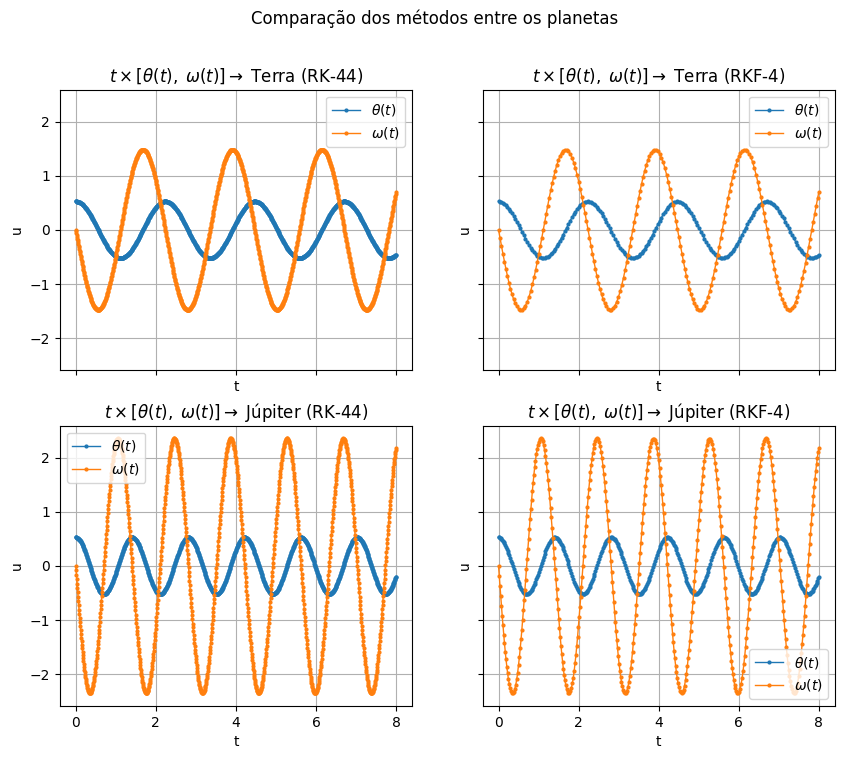

In [27]:
g = 9.81
u_rk44_ter = rk44_vet(u0, t0, T, f, 1000)
u_rkfc_ter, t_ter = metodo_rkf_completo(u0, t0, T, f, eps=1E-6)
print("Número de passos Terra = " + str(len(t_ter)))

g = 24.79
u_rk44_jup = rk44_vet(u0, t0, T, f, 1000)
u_rkfc_jup, t_jup = metodo_rkf_completo(u0, t0, T, f, eps=1E-6)
print("Número de passos Júpiter = " + str(len(t_jup)))

print()

fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

fig.suptitle("Comparação dos métodos entre os planetas")

axs[0, 0].set_xlabel("t")
axs[0, 1].set_xlabel("t")
axs[1, 0].set_xlabel("t")
axs[1, 1].set_xlabel("t")

axs[0, 0].set_ylabel("u")
axs[0, 1].set_ylabel("u")
axs[1, 0].set_ylabel("u")
axs[1, 1].set_ylabel("u")

axs[0, 0].set_title(r"$t \times [\theta(t),\; \omega(t)] \rightarrow $ Terra (RK-44)")
axs[0, 1].set_title(r"$t \times [\theta(t),\; \omega(t)] \rightarrow $ Terra (RKF-4)")
axs[1, 0].set_title(r"$t \times [\theta(t),\; \omega(t)] \rightarrow $ Júpiter (RK-44)")
axs[1, 1].set_title(r"$t \times [\theta(t),\; \omega(t)] \rightarrow $ Júpiter (RKF-4)")

t_rk44 = np.linspace(t0, T, 1000 + 1)

axs[0, 0].plot(t_rk44, u_rk44_ter[:, 0], '-o', label=r"$\theta(t)$", linewidth=1, markersize=2)
axs[0, 0].plot(t_rk44, u_rk44_ter[:, 1], '-o', label=r"$\omega(t)$", linewidth=1, markersize=2)
axs[0, 1].plot(t_ter , u_rkfc_ter[:, 0], '-o', label=r"$\theta(t)$", linewidth=1, markersize=2)
axs[0, 1].plot(t_ter , u_rkfc_ter[:, 1], '-o', label=r"$\omega(t)$", linewidth=1, markersize=2)
axs[1, 0].plot(t_rk44, u_rk44_jup[:, 0], '-o', label=r"$\theta(t)$", linewidth=1, markersize=2)
axs[1, 0].plot(t_rk44, u_rk44_jup[:, 1], '-o', label=r"$\omega(t)$", linewidth=1, markersize=2)
axs[1, 1].plot(t_jup , u_rkfc_jup[:, 0], '-o', label=r"$\theta(t)$", linewidth=1, markersize=2)
axs[1, 1].plot(t_jup , u_rkfc_jup[:, 1], '-o', label=r"$\omega(t)$", linewidth=1, markersize=2)

for ax in axs.flat:
    ax.legend()
    ax.grid()

plt.show()

--------------

## Aplicações: O Circuito de Chua


O circuito de Chua é um circuito elétrico simples formado por 2 capacitores lineares ($C_1$ e $C_2$), um resistor linear ($R$), um indutor linear ($L$) e um resistor não linear controlado pela tensão ($N_R$), conforme a figura abaixo.

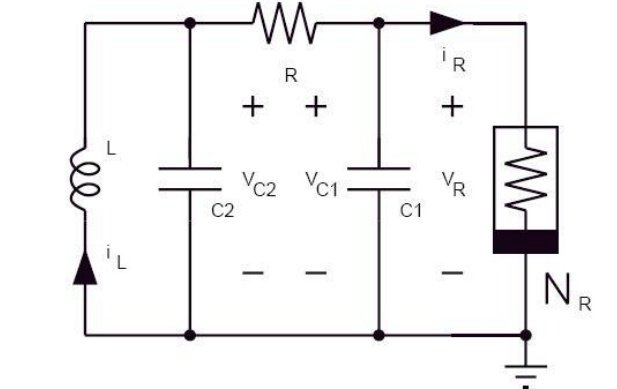


O resistor não linear $N_R$, conhecido como diodo de Chua, é definido de forma linear por pedaços, isto é, dependendo da tensão ele fornece uma resistência diferente. A corrente de $N_R$ é definida por
\begin{equation*}
g(V)=
\begin{cases}
G_b V + (G_b-G_a) E, &\quad \text{se} \quad V \leq -E \\
G_a V, &\quad \text{se} \quad -E < V < E \\
G_b V + (G_a-G_b) E, &\quad \text{se} \quad V \geq E\\
\end{cases}
\end{equation*}

onde $G_a$ e $G_b$ são inclinações das curvas da relação tensão ($V$) versus corrente ($i$) e $E>0$ é um valor de tensão de corte para mudança de regime, conforme o gráfico abaixo.

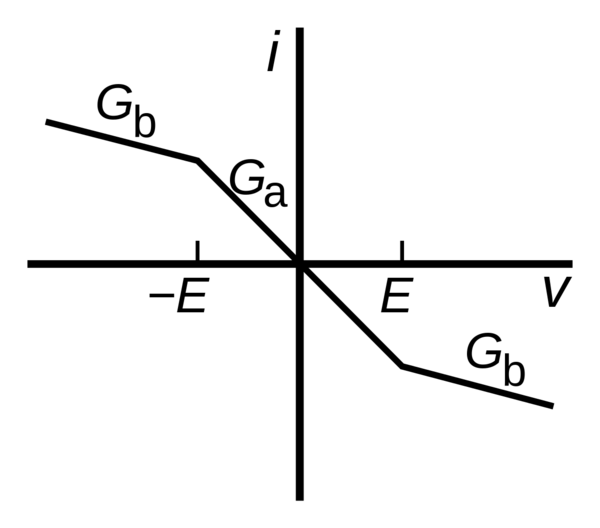


Usando as leis de  Kirchhoff para esse circuito é possível deduzirmos o seguinte sistema de equações diferenciais para as tensões nos capacitores ($V_{C_1}$ e $V_{C_2}$) e a corrente no indutor ($I_L$),
\begin{eqnarray*}
\dot{V}_{C_1}&=&\frac{1}{R C_1}(V_{C_2}-V_{C_1})-\frac{1}{C_1} g(V_{C_1}), \\
\dot{V}_{C_2}&=&\frac{1}{R C_2}(V_{C_1}-V_{C_2})+\frac{1}{C_2}I_L,\\
\dot{I}_L&=&-\frac{1}{L}V_{C_2}.
\end{eqnarray*}


O interessante desse circuito é que ele é simples de ser montado (veja aqui: https://inst.eecs.berkeley.edu/~ee129/sp10/handouts/ChuasCircuitForHighSchoolStudents-PREPRINT.pdf ) e define um sistema dinâmico caótico, para o qual pequenas variações nos parâmetros e condições iniciais podem levar a soluções bastante distintas!

Vamos ver um exemplo de solução desse problema baseado em http://www.chuacircuits.com/ !

#### Exemplo de Circuito de Chua


Vamos considerar os seguintes parâmetros fixados:

*   Alimentação por bateria de $9V$
*   $C_1  =  10 nF $
*   $C_2 = 100 nF $
*   $L = 18 mH $

Para o resistor não linear considerar:
*  $E=1.17391304 V,$
*  $G_a=-50/66 mS,$
*  $G_b=-9/22 mS. $

Para simular um comportamento passível de ser implementado fisicamente, o resistor não linear precisa de parâmetros adicionais para manter o sistema dentro de tensões realizáveis. Considere que a equação definida anteriormente para o resistor não linear é válida para tensões em módulo menores que $E_{\max}$. Para tensões maiores do que isso, considerar
\begin{equation*}
g(V)=
\begin{cases}
G_c V + E_{\max} (G_c-G_b) +  E (G_b-G_a) & \quad \text{se} \quad V \leq -E_{\max} \\
G_b V + (G_b-G_a) E, &\quad \text{se} \quad -E_{\max} < V \leq -E \\
G_a V, &\quad \text{se} \quad -E < V < E \\
G_b V + (G_a-G_b) E, &\quad \text{se} \quad E \leq V < E_{\max}\\
G_c V + E_{\max} (G_b-G_c) +  E (G_a-G_b) & \quad \text{se} \quad  E_{\max} \leq V \\
\end{cases}
\end{equation*}
Adotaremos $E_{\max}=8.1818$ V e $G_c=4.591$ mS.



In [28]:
#Definindo os parâmetros
C1 = 10*10**(-9)
print("C1 =", C1 , "F")

C2 = 100*10**(-9)
print("C2 =", C2 , "F")

L = 18*10**(-3)
print("L =", L , "H")

E = 1.17391304
print("E =", E , "V")

Emax = 8.1818
print("Emax =", Emax , "V")

Ga =-(50/66)*10**(-3)
print("Ga =", Ga , "S")

Gb =-(9/22)*10**(-3)
print("Gb =", Gb , "S")

Gc = 4.591*10**(-3)
print("Gc =", Gc , "S")

R = 1800
print("R =", R , "Ohms")

C1 = 1e-08 F
C2 = 1.0000000000000001e-07 F
L = 0.018000000000000002 H
E = 1.17391304 V
Emax = 8.1818 V
Ga = -0.0007575757575757576 S
Gb = -0.00040909090909090913 S
Gc = 0.0045910000000000005 S
R = 1800 Ohms


In [29]:
# Função g
#  (não é vetorial por conta dos ifs!)
def g(V):
  if V <= -Emax:
    return Gc*V+Emax*(Gc-Gb)+E*(Gb-Ga)
  if V <= -E:
    return Gb*V+E*(Gb-Ga)
  if V <= E:
    return Ga*V
  if V <= Emax:
    return Gb*V+E*(Ga-Gb)
  if V >= Emax:
    return Gc*V+Emax*(Gb-Gc)+E*(Ga-Gb)

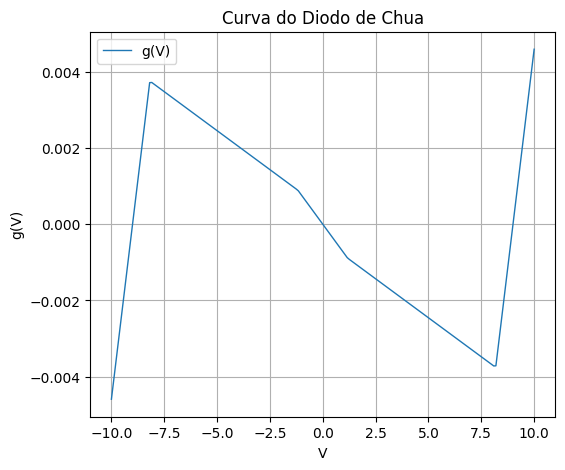

In [30]:
#Voltagens de teste para gráfico da função g
v = np.linspace(-10, 10, 200)
gv = np.zeros_like(v)
for i, vi in enumerate(v):
  gv[i] = g(vi)

figure, axs = plt.subplots(figsize=(6,5))
plt.title("Curva do Diodo de Chua")
plt.xlabel("V")
plt.ylabel("g(V)")
plt.plot(v, gv, '-', label="g(V)", linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.show()

Ao final, temos o seguinte sistema de EDOs:

\begin{eqnarray*}
\dot{V}_{C_1}&=&\frac{1}{R C_1}(V_{C_2}-V_{C_1})-\frac{1}{C_1} g(V_{C_1}), \\
\dot{V}_{C_2}&=&\frac{1}{R C_2}(V_{C_1}-V_{C_2})+\frac{1}{C_2}I_L,\\
\dot{I}_L&=&-\frac{1}{L}V_{C_2}.
\end{eqnarray*}

Assumiremos como condições iniciais $V_{C_1}=-0.5V$, $V_{C_2}=-0.2$ e $I_L=0$. Vamos variar o valor do resistor ($R$) nos experimentos a seguir.

### ❗Exercício 4❗

Este sistema é um sistema que com características caóticas dependendo dos parêmetros. Vamos simular as características do sistema variando a resistência $R$, como faríamos no caso prático, girando um potenciômetro.

**Tarefa**: Simule, usando o seu método de Runge–Kutta–Fehlberg vetorial o sistema variando a resistência entre $R=1000 \Omega$ e $R=3000 \Omega$ , fazendo 2 tipos de gráficos:
- Gráficos da evolução de $V_{C_1}(t)$, $V_{C_2}(t)$ e $I_L(t)$ ao longo do tempo, no plano $(t, y)$.
- Gráficos das órbitas/trajetórias de $V_{C_1}(t)$, $V_{C_2}(t)$ e $I_L(t)$ em dimensão 3, plotanto a curva $(V_{C_1}(t),V_{C_2}(t),I_L(t))$.

Responda:
1.  Para que valores de $R$ o sistema converge para uma órbita periódica? Neste caso, passado um certo tempo (longo) o sistema fica rodando em ciclos, retornando a condições que já teve depois de um período. (Por conta da precisão do método e da aritmética de ponto flutuante, a órbita não será exatamente periódica, mas deve retornar após um certo tempo a um ponto bem próximo de onde já esteve antes).
2.  Para que valores de $R$ o sistema converge para um um ponto estacionário? (Ponto atrator, de equilíbrio do sistema).
3.  Encontre os valores críticos de $R$ para os quais o sistema deixa de convergir para órbitas perídicas e passa a oscilar em um "atrator estranho" (parecem asas de borboleta em 3D?). Esses valores de $R$ são conhecidos como pontos de bifurcação do sistema.

As respostas podem ser aproximadas (valores de $R$). Tente comentar sobre o comportamento da solução em cada caso, e se há comportamentos diferentes dentre as possíveis órbitas perídicas.

**Observação:** O objetivo dessa atividade é verificar que mesmo em sistemas dinâmicos (sistemas de EDOs) originados de problemas práticos, neste caso um circuito eletrônico, as soluções podem ter características bem distintas dependendo dos parâmetros. Com isso, fica o alerta sobre a sensibilidade a parâmetros em certos problemas reais!



In [31]:
# E4-Q0: Organizar definições + Simular Chua com dados anteriores
# Código de inicialização do problema (professores)

# Nosso problema
def I_chua(v_chua):
    # Código para o cálculo da Condutância não linear G(V) do diodo de Chua

    # Entradas:
    # V ---> Voltagem no Diodo de Chua

    # Saídas:
    # G(V) ---> Condutância do Diodo de Chua

    if v_chua <= -Emax:
        return Gc * v_chua + Emax * (Gc - Gb) + E * (Gb - Ga)
    if v_chua <= -E:
        return Gb * v_chua + E * (Gb - Ga)
    if v_chua <=  E:
        return Ga * v_chua
    if v_chua <=  Emax:
        return Gb * v_chua + E * (Ga - Gb)
    if v_chua >=  Emax:
        return Gc * v_chua + Emax * ( Gb - Gc) + E * (Ga - Gb)

def f_chua(t, u):
    # Código de u'(t, u) para problema do Circuito de Chua

    # Entradas:
    # t ---> Tempo
    # u ---> Estado [VC1, VC2, IL]

    # Saídas:
    # Derivada de u ---> u'(t) [Vetorial]

    VC1, VC2, IL = u

    dVC1 = (1 / (R * C1)) * ((VC2 - VC1) - R * I_chua(VC1))
    dVC2 = (1 / (R * C2)) * ((VC1 - VC2) - R * IL)
    dIL  = (1 / (  L   )) * (VC2)

    return np.array([dVC1, dVC2, dIL])

# Dados
C1 = 10E-9
C2 = 100E-9
L = 18E-3
E = 1.17391304
Emax = 8.1818
Ga = -(50/66) * 1E-3
Gb = -(9/22) * 1E-3
Gc = (4.591) * 1E-3

# Inicialização
u0 = np.array([-0.5, -0.2, 0.0])
t0 = 0
T = 1E-2

In [32]:
# E4-Q1: Órbita Periódica (R = 1450)

R = 1450
u_chua, t_chua = metodo_rkf_completo(u0, t0, 1E-2, f_chua, eps=1E-4, C=2, hmin=1E-10, hmax=1E-1)

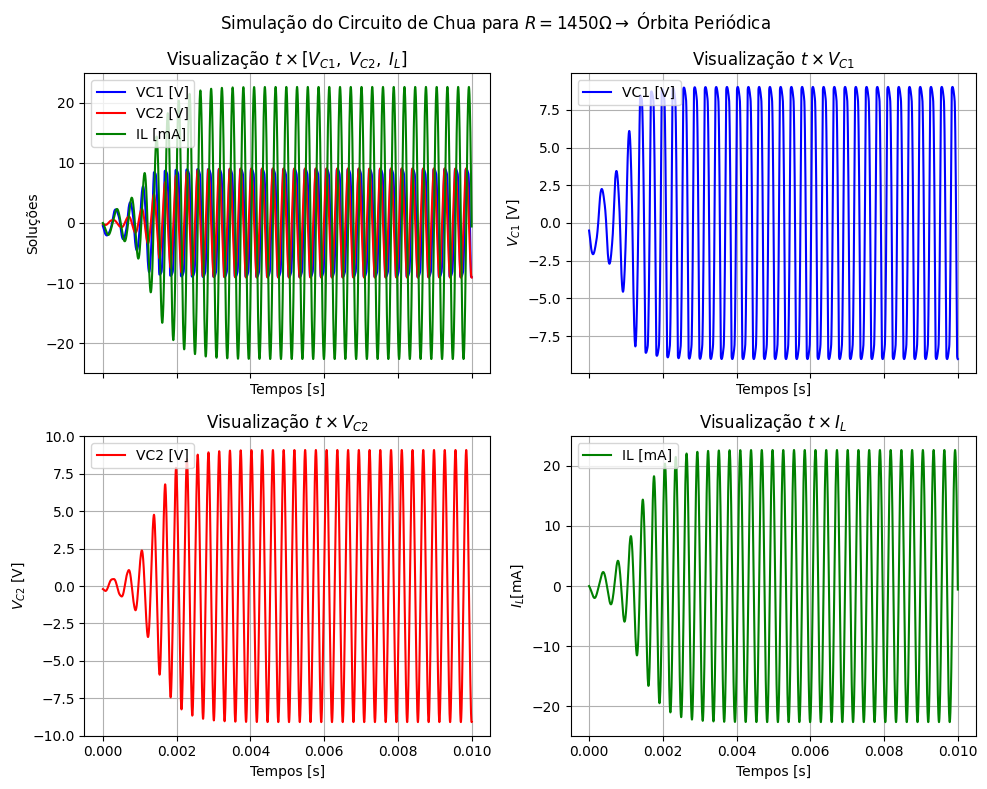

In [33]:
# E4-Q1: Gráfico 2D para Órbita Periódica (R = 1450)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True)

fig.suptitle(r"Simulação do Circuito de Chua para $R = 1450 \Omega \rightarrow$ Órbita Periódica")

axs[0, 0].set_xlabel("Tempos [s]")
axs[0, 1].set_xlabel("Tempos [s]")
axs[1, 0].set_xlabel("Tempos [s]")
axs[1, 1].set_xlabel("Tempos [s]")

axs[0, 0].set_ylabel("Soluções")
axs[0, 1].set_ylabel("$V_{C1}$ [V]")
axs[1, 0].set_ylabel("$V_{C2}$ [V]")
axs[1, 1].set_ylabel("$I_L$[mA]")

axs[0, 0].set_title(r"Visualização $t \times [V_{C1},\; V_{C2},\; I_{L}]$")
axs[0, 1].set_title(r"Visualização $t \times V_{C1}$")
axs[1, 0].set_title(r"Visualização $t \times V_{C2}$")
axs[1, 1].set_title(r"Visualização $t \times I_{L}$")

axs[0, 0].plot(t_chua, u_chua.T[0], label="VC1 [V]", color="blue")
axs[0, 1].plot(t_chua, u_chua.T[0], label="VC1 [V]", color="blue")
axs[0, 0].plot(t_chua, u_chua.T[1], label="VC2 [V]", color="red")
axs[1, 0].plot(t_chua, u_chua.T[1], label="VC2 [V]", color="red")
axs[0, 0].plot(t_chua, u_chua.T[2] * 1000, label="IL [mA]", color="green")
axs[1, 1].plot(t_chua, u_chua.T[2] * 1000, label="IL [mA]", color="green")

for ax in axs.flat:
    ax.legend(loc="upper left")
    ax.grid()

plt.tight_layout()
plt.show()

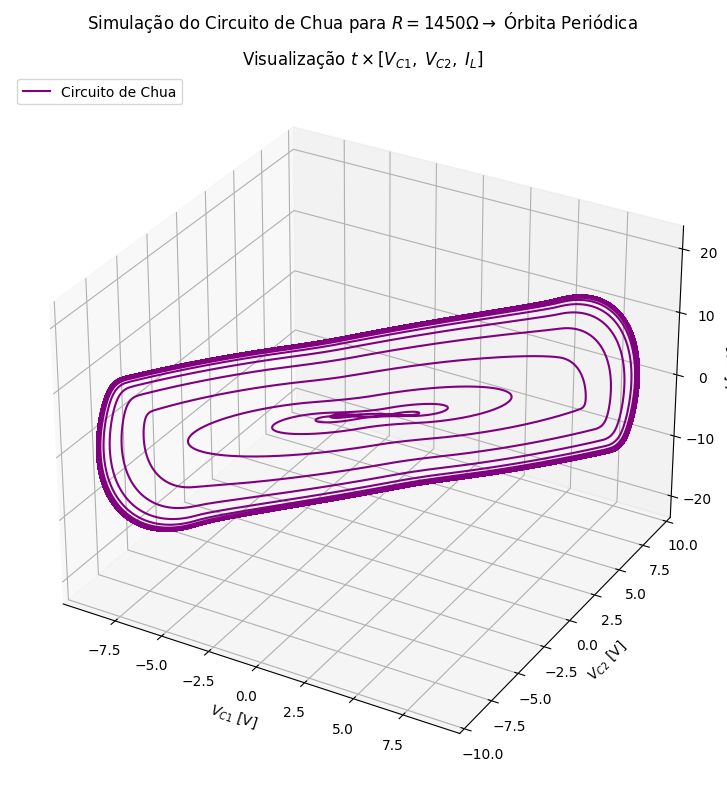

In [34]:
# E4-Q1: Gráfico 3D para Órbita Periódica (R = 1450)

fig = plt.figure(figsize=(10, 8))
axs = fig.add_subplot(projection='3d')

fig.suptitle(r"Simulação do Circuito de Chua para $R = 1450 \Omega \rightarrow$ Órbita Periódica")
axs.set_xlabel("$V_{C1}$ [V]")
axs.set_ylabel("$V_{C2}$ [V]")
axs.set_zlabel("$I_{L} [mA]$")
axs.set_title(r"Visualização $t \times [V_{C1},\; V_{C2},\; I_{L}]$")
axs.plot(u_chua.T[0], u_chua.T[1], u_chua.T[2] * 1000, color= "purple", label="Circuito de Chua")

plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [35]:
# E4-Q2: Órbita em Atrator (R = 1800)

R = 1800
u_chua, t_chua = metodo_rkf_completo(u0, t0, T, f_chua, eps=1E-4, C=2, hmin=1E-10, hmax=1E-1)

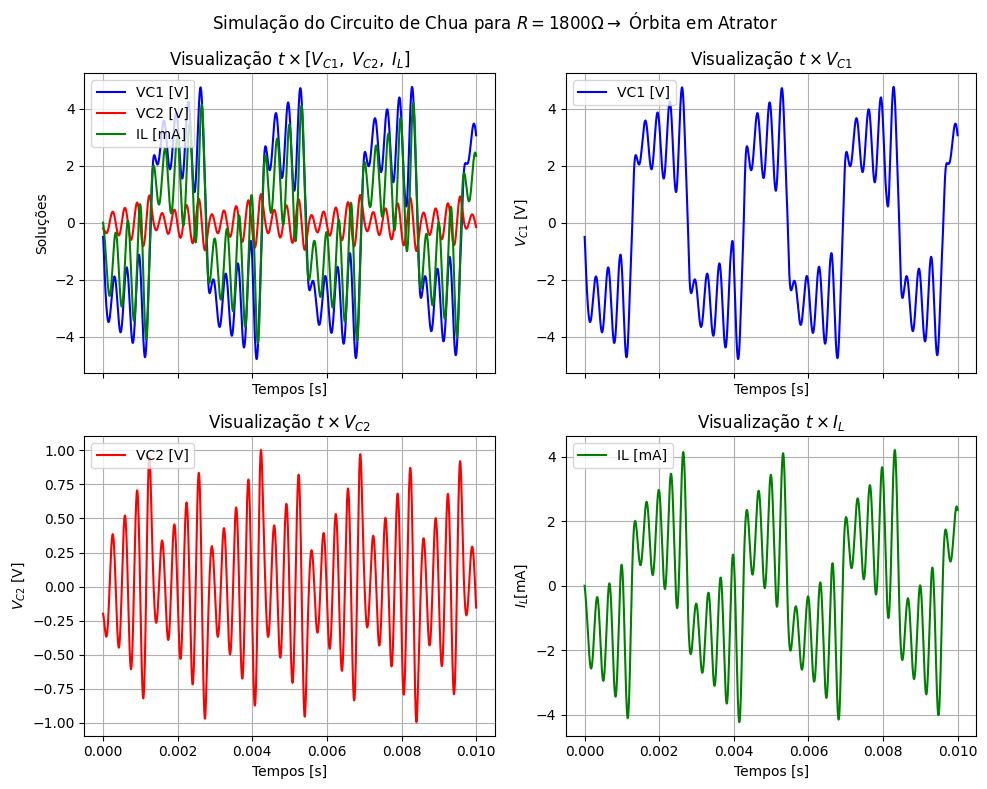

In [36]:
# E4-Q2: Gráfico 2D para Órbita em Atrator (R = 1800)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True)

fig.suptitle(r"Simulação do Circuito de Chua para $R = 1800 \Omega \rightarrow$ Órbita em Atrator")

axs[0, 0].set_xlabel("Tempos [s]")
axs[0, 1].set_xlabel("Tempos [s]")
axs[1, 0].set_xlabel("Tempos [s]")
axs[1, 1].set_xlabel("Tempos [s]")

axs[0, 0].set_ylabel("Soluções")
axs[0, 1].set_ylabel("$V_{C1}$ [V]")
axs[1, 0].set_ylabel("$V_{C2}$ [V]")
axs[1, 1].set_ylabel("$I_L$[mA]")

axs[0, 0].set_title(r"Visualização $t \times [V_{C1},\; V_{C2},\; I_{L}]$")
axs[0, 1].set_title(r"Visualização $t \times V_{C1}$")
axs[1, 0].set_title(r"Visualização $t \times V_{C2}$")
axs[1, 1].set_title(r"Visualização $t \times I_{L}$")

axs[0, 0].plot(t_chua, u_chua.T[0], label="VC1 [V]", color="blue")
axs[0, 1].plot(t_chua, u_chua.T[0], label="VC1 [V]", color="blue")
axs[0, 0].plot(t_chua, u_chua.T[1], label="VC2 [V]", color="red")
axs[1, 0].plot(t_chua, u_chua.T[1], label="VC2 [V]", color="red")
axs[0, 0].plot(t_chua, u_chua.T[2] * 1000, label="IL [mA]", color="green")
axs[1, 1].plot(t_chua, u_chua.T[2] * 1000, label="IL [mA]", color="green")

for ax in axs.flat:
    ax.legend(loc="upper left")
    ax.grid()

plt.tight_layout()
plt.show()

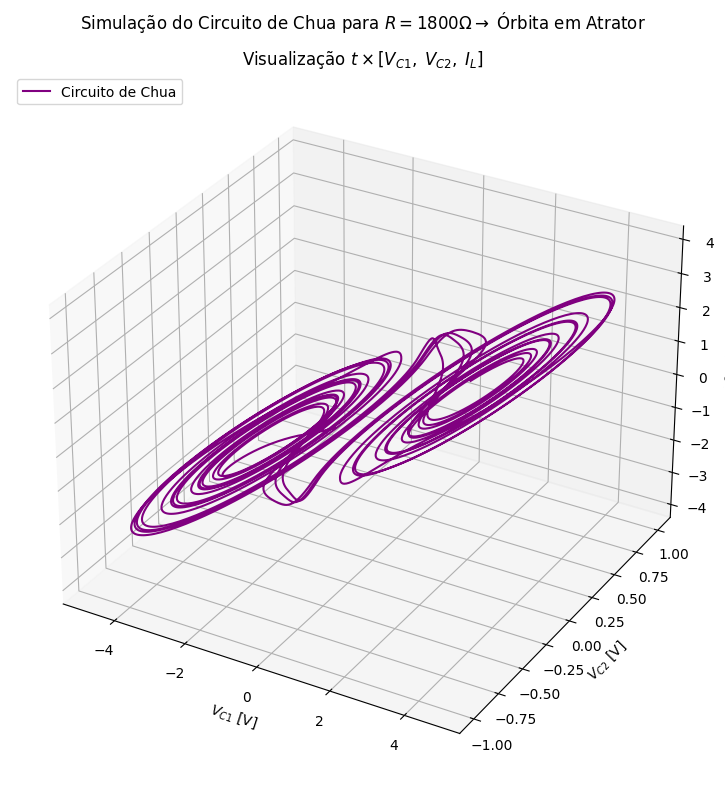

In [37]:
# E4-Q1: Gráfico 3D para Órbita em Atrator (R = 1800)

fig = plt.figure(figsize=(10, 8))
axs = fig.add_subplot(projection='3d')

fig.suptitle(r"Simulação do Circuito de Chua para $R = 1800 \Omega \rightarrow$ Órbita em Atrator")
axs.set_xlabel("$V_{C1}$ [V]")
axs.set_ylabel("$V_{C2}$ [V]")
axs.set_zlabel("$I_{L} [mA]$")
axs.set_title(r"Visualização $t \times [V_{C1},\; V_{C2},\; I_{L}]$")
axs.plot(u_chua.T[0], u_chua.T[1], u_chua.T[2] * 1000, color= "purple", label="Circuito de Chua")

plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [38]:
# E4-Q3: Órbita para Ponto Estacionário (R = 2500)

R = 2500
u_chua, t_chua = metodo_rkf_completo(u0, t0, T, f_chua, eps=1E-4, C=2, hmin=1E-10, hmax=1E-1)

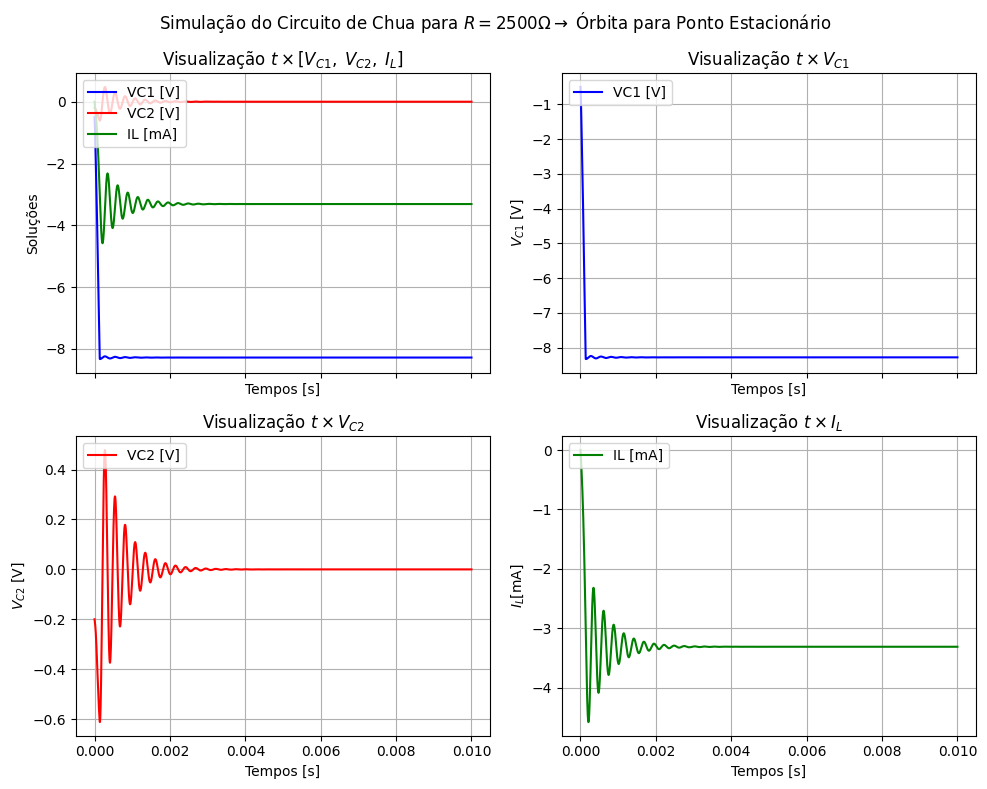

In [39]:
# E4-Q2: Gráfico 2D para Órbita para Ponto Estacionário (R = 2500)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True)

fig.suptitle(r"Simulação do Circuito de Chua para $R = 2500 \Omega \rightarrow$ Órbita para Ponto Estacionário")

axs[0, 0].set_xlabel("Tempos [s]")
axs[0, 1].set_xlabel("Tempos [s]")
axs[1, 0].set_xlabel("Tempos [s]")
axs[1, 1].set_xlabel("Tempos [s]")

axs[0, 0].set_ylabel("Soluções")
axs[0, 1].set_ylabel("$V_{C1}$ [V]")
axs[1, 0].set_ylabel("$V_{C2}$ [V]")
axs[1, 1].set_ylabel("$I_L$[mA]")

axs[0, 0].set_title(r"Visualização $t \times [V_{C1},\; V_{C2},\; I_{L}]$")
axs[0, 1].set_title(r"Visualização $t \times V_{C1}$")
axs[1, 0].set_title(r"Visualização $t \times V_{C2}$")
axs[1, 1].set_title(r"Visualização $t \times I_{L}$")

axs[0, 0].plot(t_chua, u_chua.T[0], label="VC1 [V]", color="blue")
axs[0, 1].plot(t_chua, u_chua.T[0], label="VC1 [V]", color="blue")
axs[0, 0].plot(t_chua, u_chua.T[1], label="VC2 [V]", color="red")
axs[1, 0].plot(t_chua, u_chua.T[1], label="VC2 [V]", color="red")
axs[0, 0].plot(t_chua, u_chua.T[2] * 1000, label="IL [mA]", color="green")
axs[1, 1].plot(t_chua, u_chua.T[2] * 1000, label="IL [mA]", color="green")

for ax in axs.flat:
    ax.legend(loc="upper left")
    ax.grid()

plt.tight_layout()
plt.show()

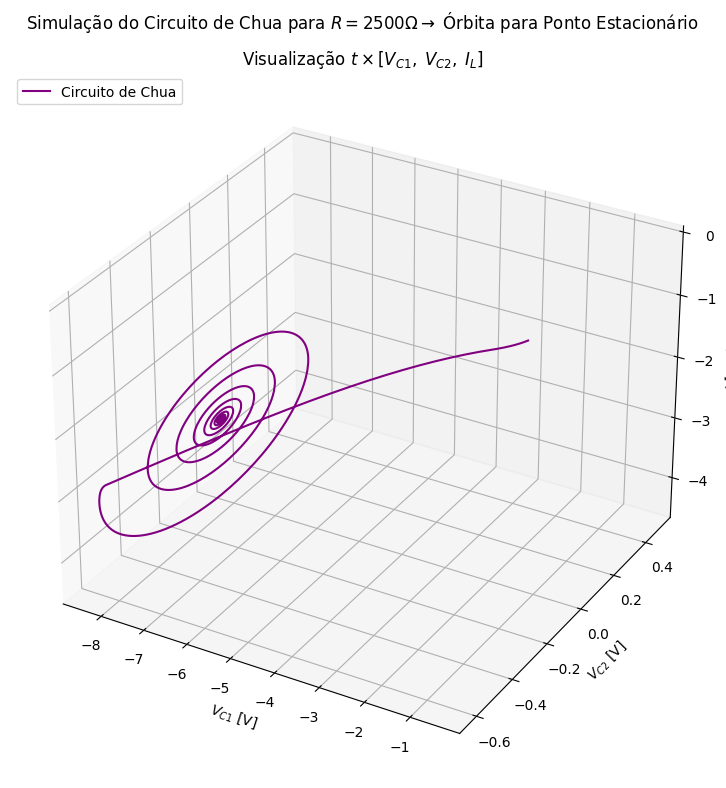

In [40]:
# E4-Q2: Gráfico 3D para Órbita para Ponto Estacionário (R = 2500)

fig = plt.figure(figsize=(10, 8))
axs = fig.add_subplot(projection='3d')

fig.suptitle(r"Simulação do Circuito de Chua para $R = 2500 \Omega \rightarrow$ Órbita para Ponto Estacionário")
axs.set_xlabel("$V_{C1}$ [V]")
axs.set_ylabel("$V_{C2}$ [V]")
axs.set_zlabel("$I_{L} [mA]$")
axs.set_title(r"Visualização $t \times [V_{C1},\; V_{C2},\; I_{L}]$")
axs.plot(u_chua.T[0], u_chua.T[1], u_chua.T[2] * 1000, color= "purple", label="Circuito de Chua")

plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

### Respostas Exercício 4:

*   **Tarefa:**

Através de tentativa e erro, foram achados alguns valores de $R$ que implicam em diferentes resultados, esses resultados tem visualizações bastantes únicas e peculiares, mas para esse exercício vou trabalhar com:

- $ R = 1.45 \; k\Omega \rightarrow$ Solução como Órbita Periódica
- $ R = 1.80 \; k\Omega \rightarrow$ Solução como Órbita em Atrator
- $ R = 2.50 \; k\Omega \rightarrow$ Solução como Órbita para Ponto Estacionário

Vale notar que existem vários valores de $R$ que satisfazem cada um desses resultados, porém achar todos por tentativa e erro seria muito exaustivo sem um algoritmo que identificasse esses padrões.

*   **Q1:**

A respeito da Órbita Periódica, podemos ver que os valores passam inicialmente por uma fase transitória e crescem gradualmente até um regime permanente senoidal. Em que os pontos de pico e frequência tornam-se estáveis. A figura em 3D é mais peculiar, pois parece um mapa topográfico.

*   **Q2:**

Sobre a Órbita em Atrator é sem dúvidas uma das mais impressionantes, sua oscilação ocorre ao redor de 2 pontos, indo para um ponto de órbita para outro a cada alguns passos de frequência. Parece que em cada órbita os pontos "ganham energia" até ficarem com o suficiente para saltar para outra órbita. A visualização 3D fica realmente com esse aspecto de borboleta com os pontos orbitando entre 2 gravidades distintas.

*   **Q3:**

Sobre a Órbita para Ponto Estacionário parecem as simulações de Física de experimento massa-mola real, em que a energia do sistema vai decaindo devido à fricção até um ponto de parada. A imagem 3D aparenta ser um vórtex ou um ponto de gravidade que "suga" o ponto para seu interior.